In [1]:
import openpyxl
import warnings
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

warnings.filterwarnings('ignore')

import pandas as pd
dataset=pd.read_excel("./PCOS_data_without_infertility.xlsx",sheet_name=1)


In [2]:
print(pd.isnull(dataset).sum())
import numpy as np


Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [3]:

count=0
for i in dataset['PCOS (Y/N)']:
    if i==1:
        count+=1
print("the number of pcos affected person", +count)


age=[]
freq=[]
dd=list(dataset['Weight (Kg)'])
for i in dataset['Weight (Kg)']:
    if i not in age:
        age.append(i)
        freq.append( dd.count(i))
print(age)
print(freq)



the number of pcos affected person 177
[44.6, 65.0, 68.8, 52.0, 74.1, 64.0, 58.5, 40.0, 71.0, 49.0, 74.0, 50.0, 57.3, 80.5, 43.0, 69.2, 52.4, 85.0, 64.2, 63.0, 42.0, 76.0, 68.0, 62.0, 56.0, 57.0, 58.0, 54.0, 73.0, 72.0, 53.0, 78.0, 33.0, 59.0, 75.0, 51.0, 67.0, 60.0, 55.0, 61.0, 70.0, 48.0, 108.0, 57.6, 43.7, 61.6, 69.5, 74.4, 45.0, 83.5, 62.5, 67.5, 91.4, 61.7, 62.2, 64.3, 68.6, 80.0, 71.2, 83.0, 79.0, 89.0, 53.4, 69.0, 56.4, 49.3, 53.2, 60.8, 46.0, 72.3, 59.6, 73.5, 88.0, 66.0, 66.3, 47.0, 47.8, 76.8, 31.0, 74.3, 58.1, 53.6, 104.0, 63.8, 62.7, 32.0, 35.0, 34.0, 53.5, 64.4, 58.9, 55.1, 55.7, 65.7, 36.0, 55.5, 82.0, 80.4, 77.9, 60.5, 76.9, 65.6, 38.0, 54.7, 71.8, 45.6, 71.5, 44.0, 61.8, 94.0, 66.1, 87.9, 44.8, 49.1, 52.9, 54.3, 63.2]
[1, 25, 1, 27, 3, 17, 1, 10, 8, 3, 5, 34, 1, 1, 3, 1, 1, 5, 1, 16, 5, 4, 15, 15, 22, 12, 13, 19, 3, 7, 12, 5, 2, 12, 4, 7, 7, 36, 20, 15, 10, 12, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 2, 4, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 8, 1, 3, 1, 1, 1

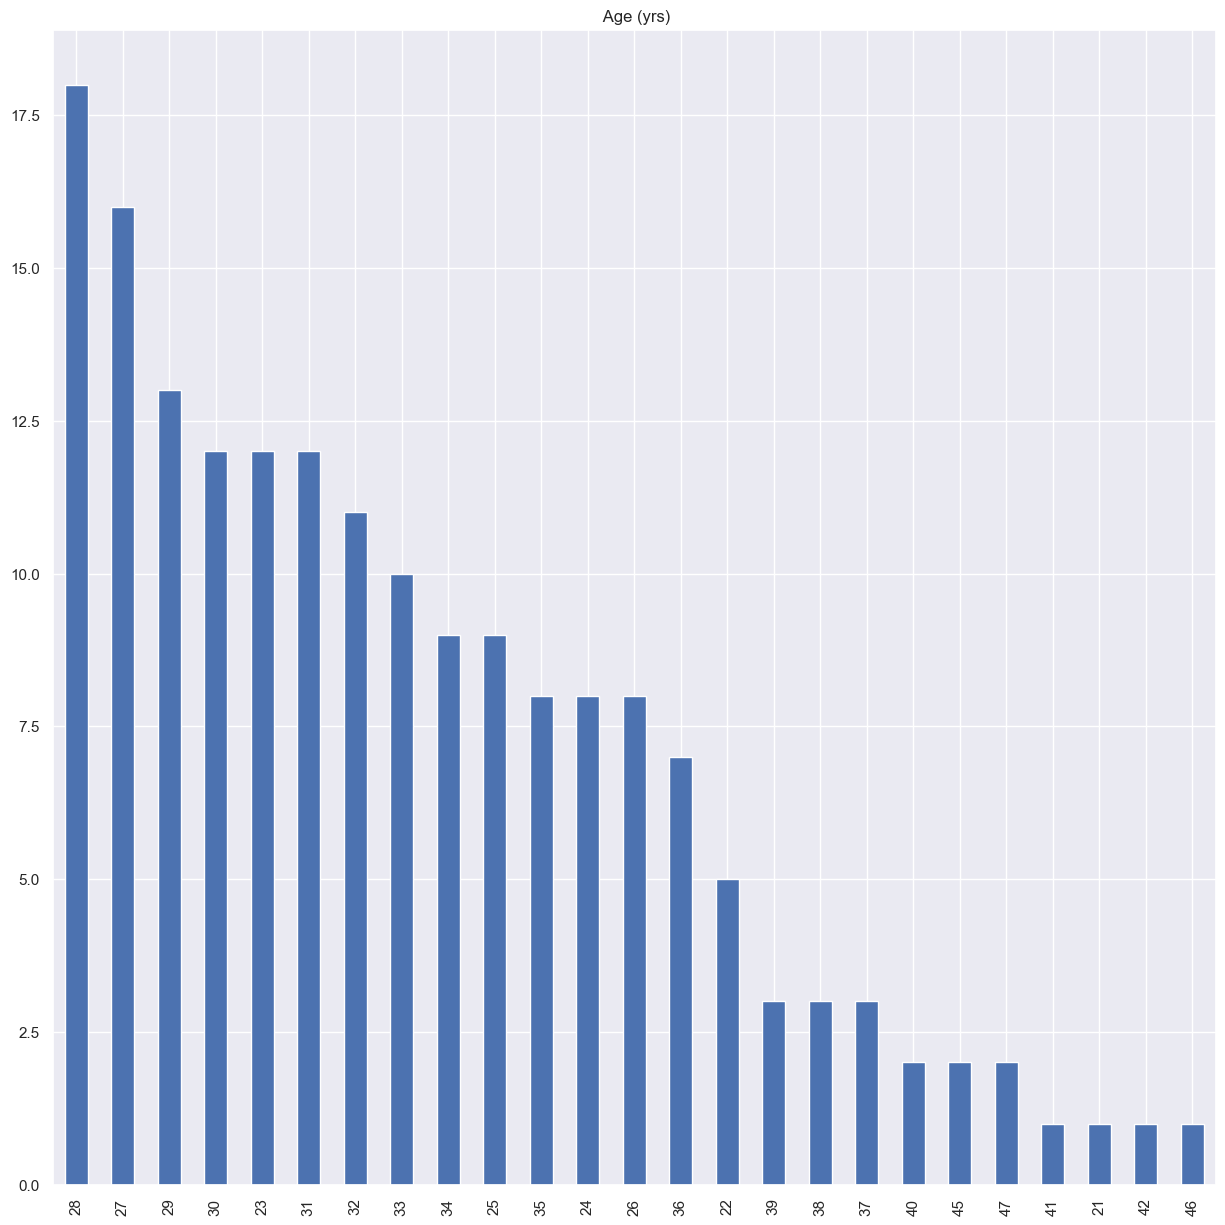

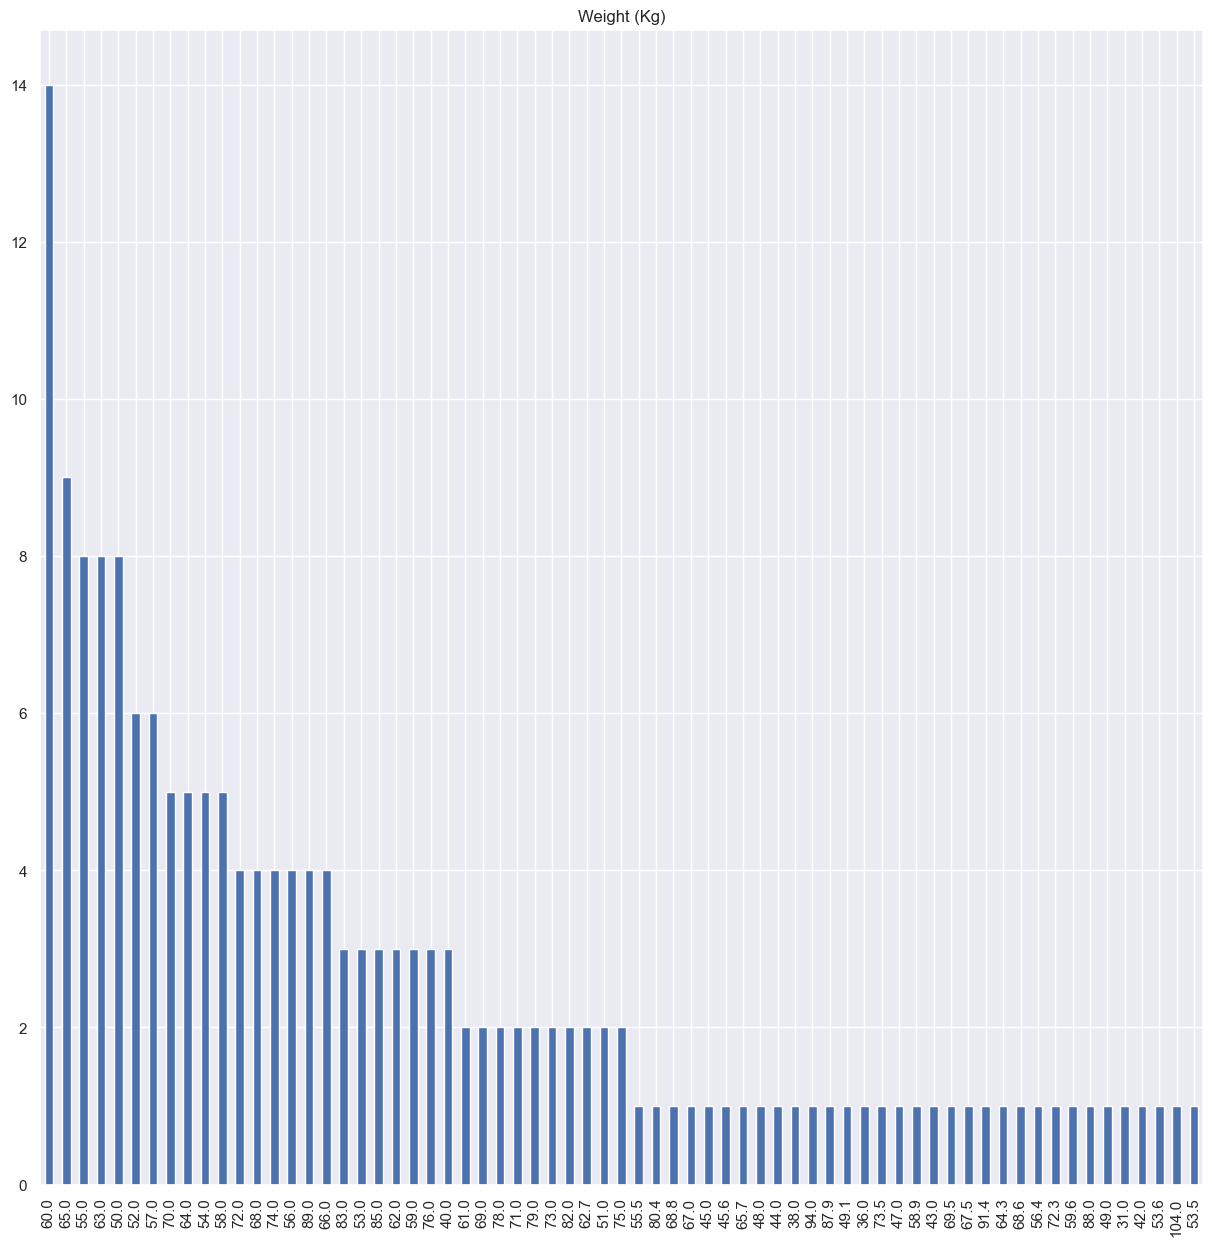

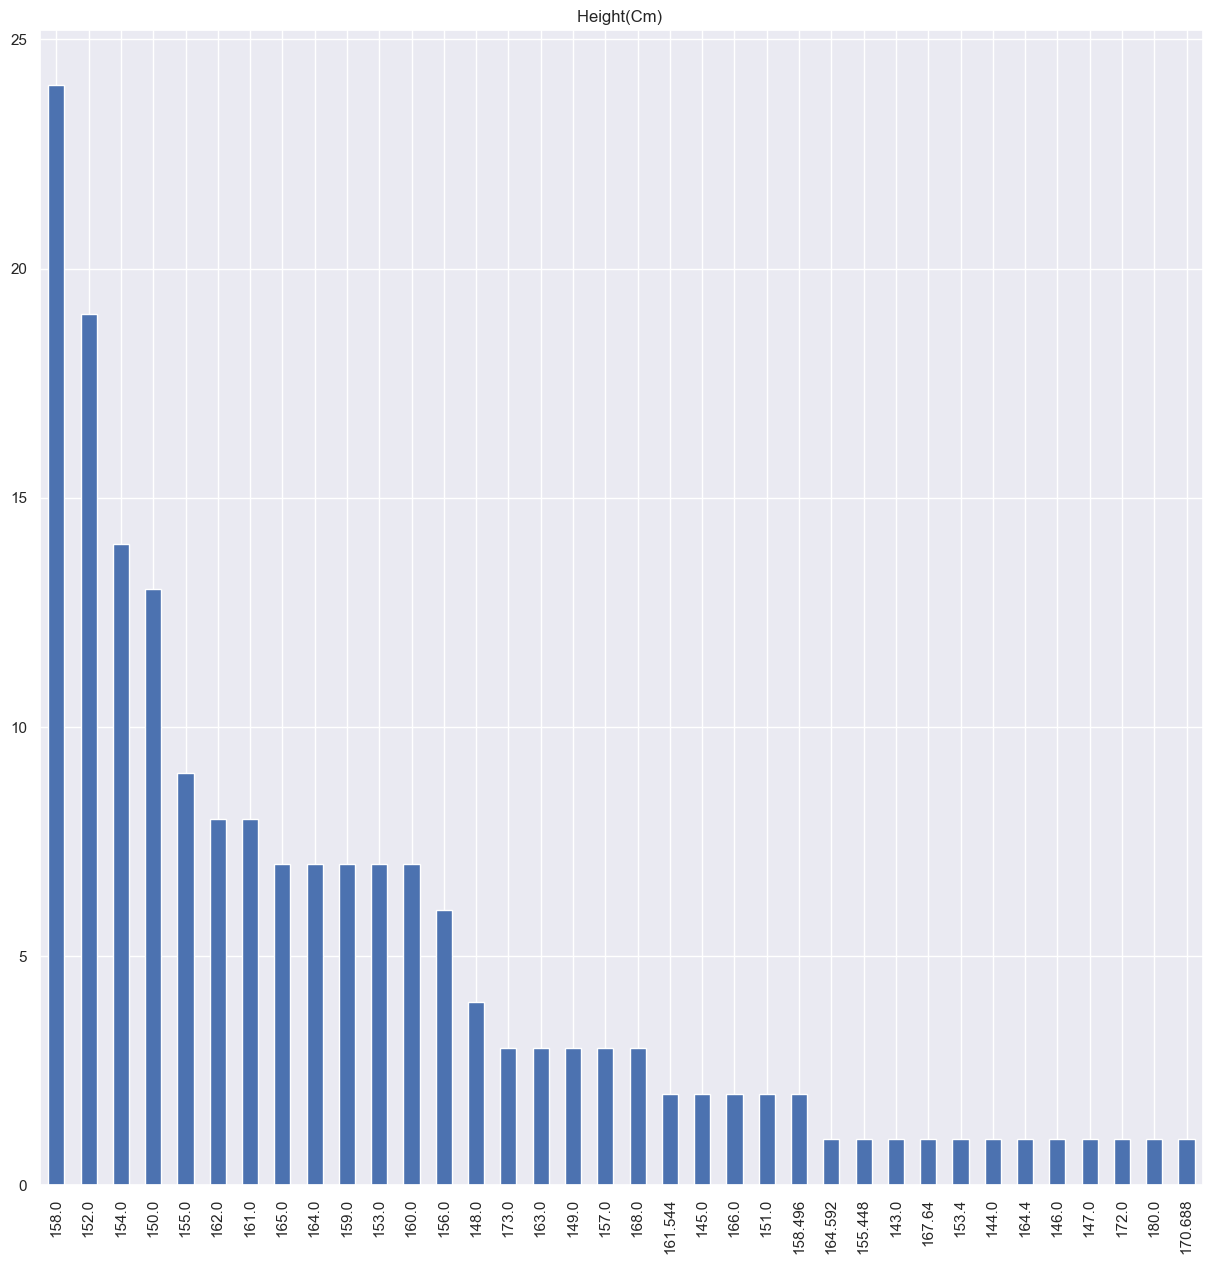

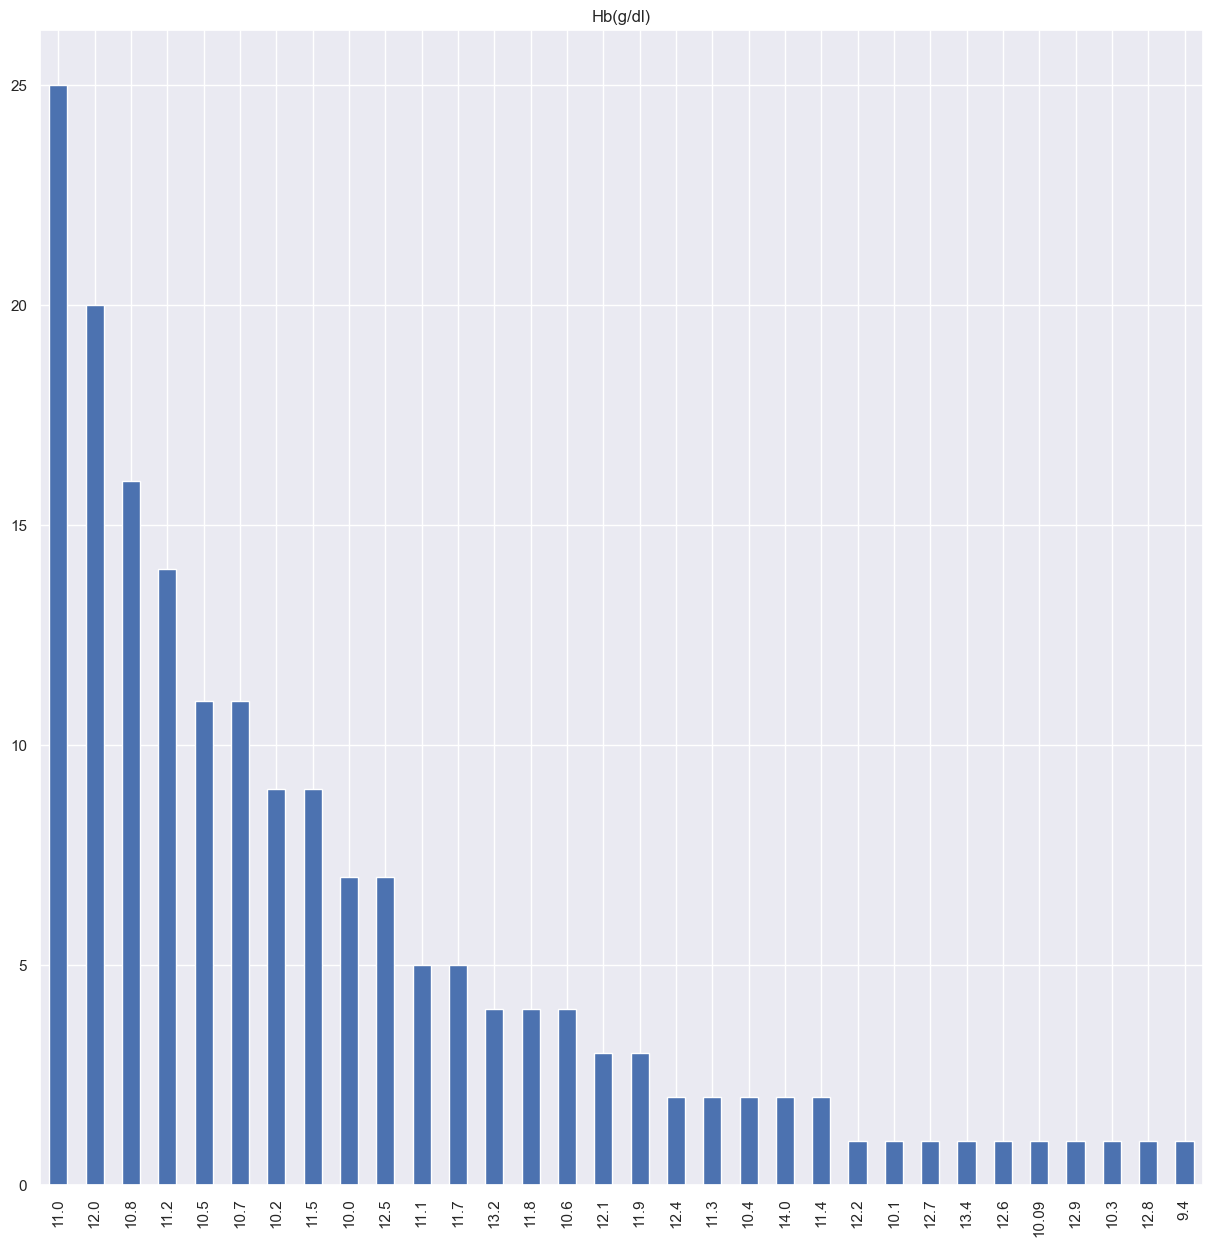

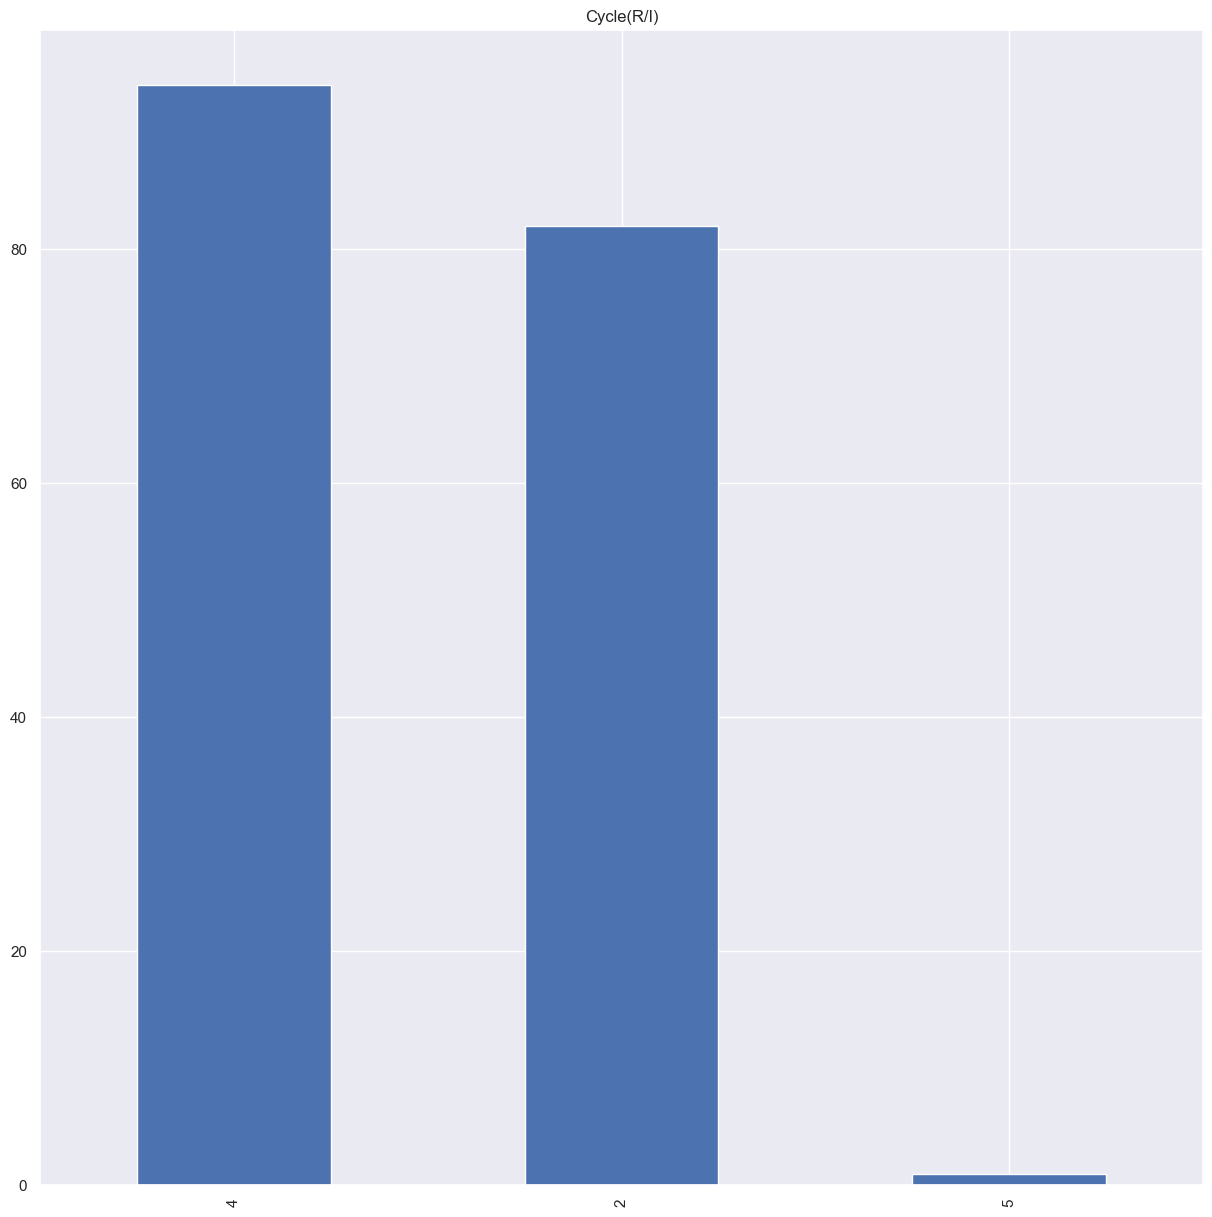

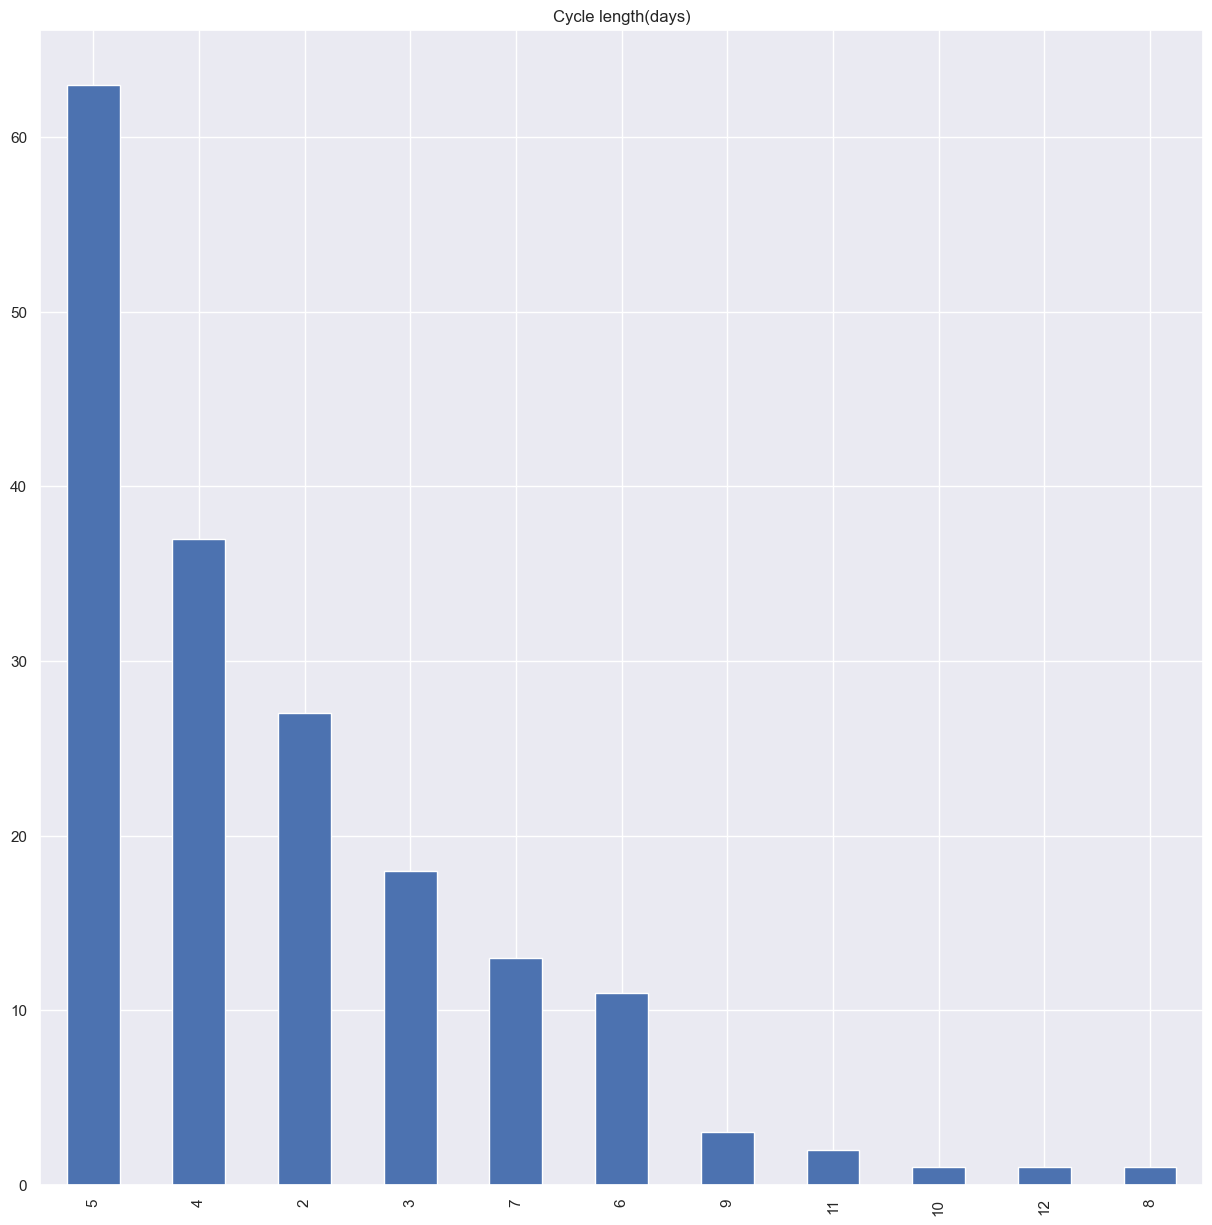

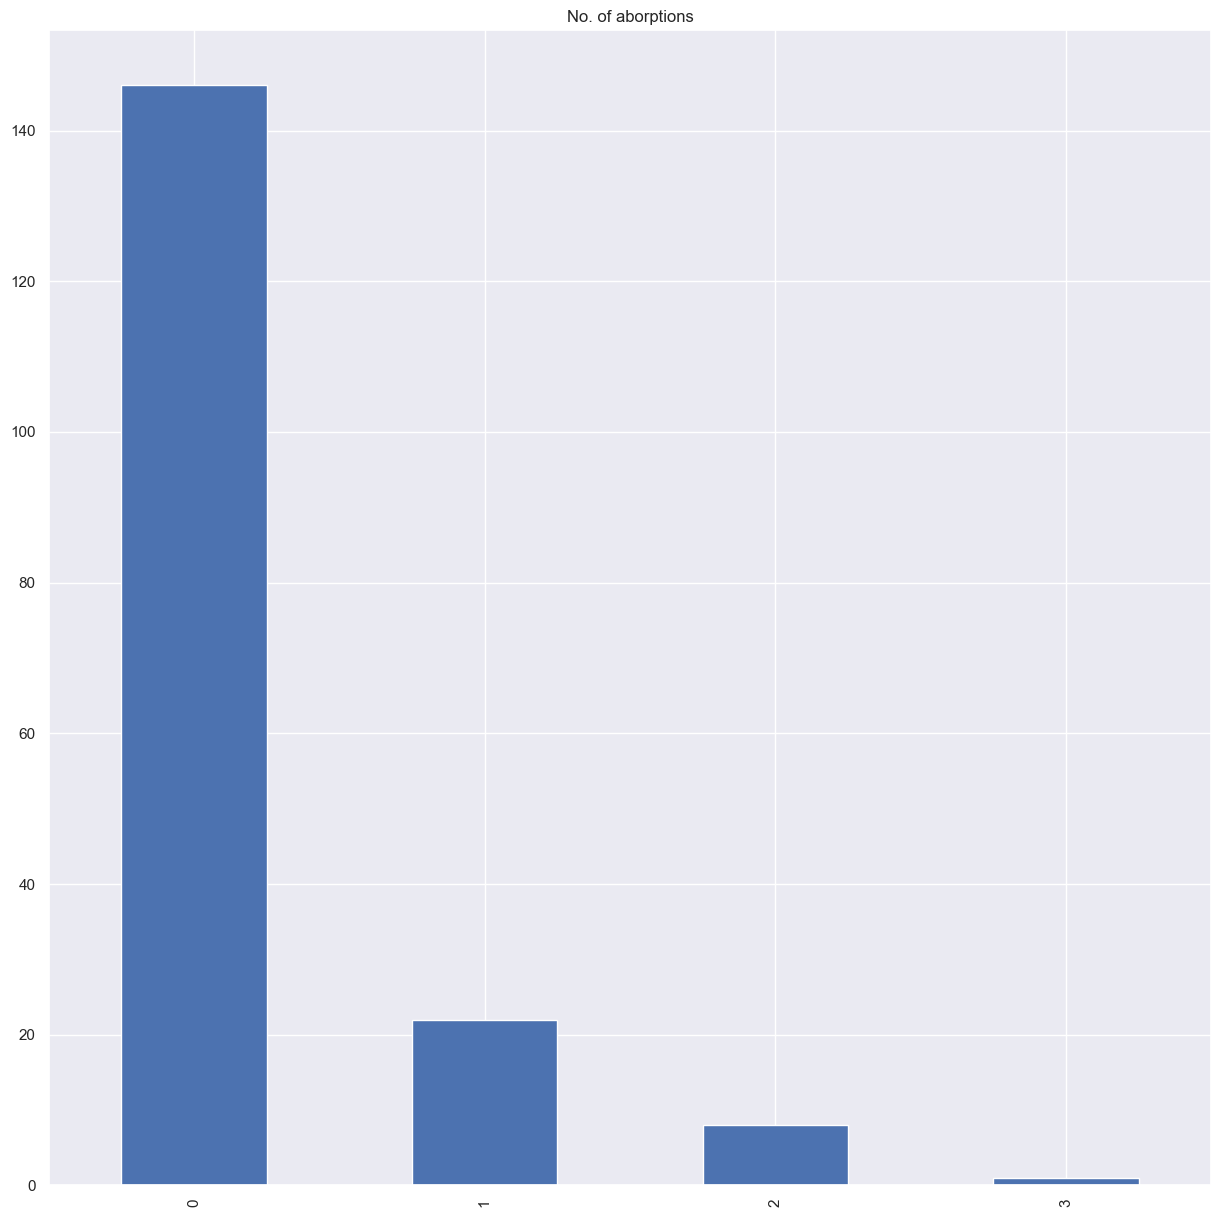

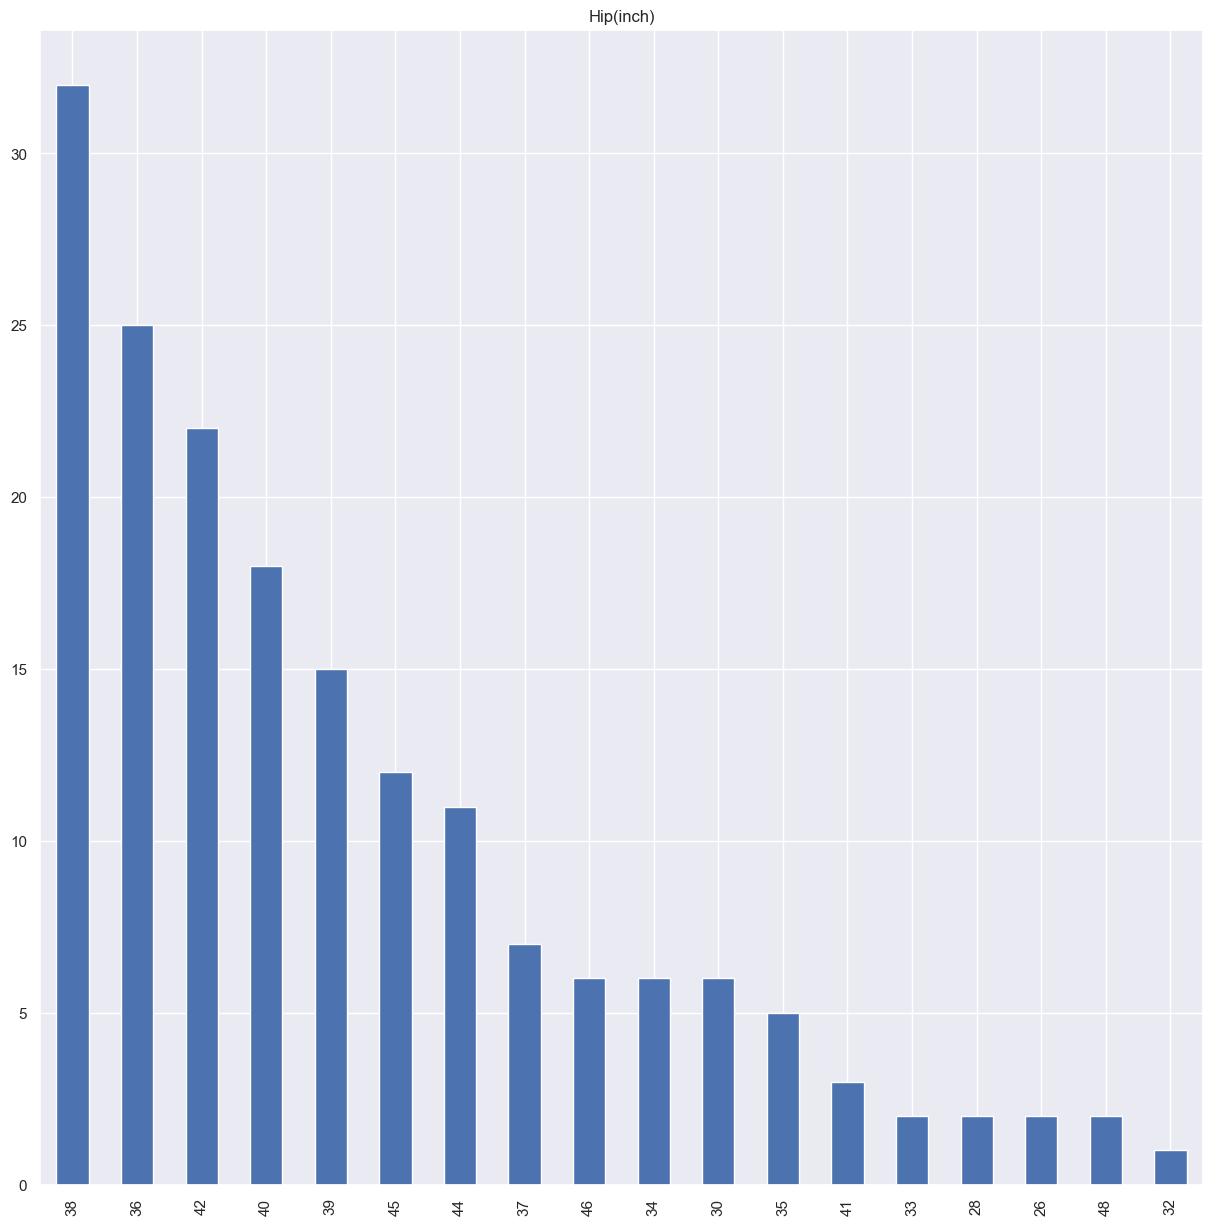

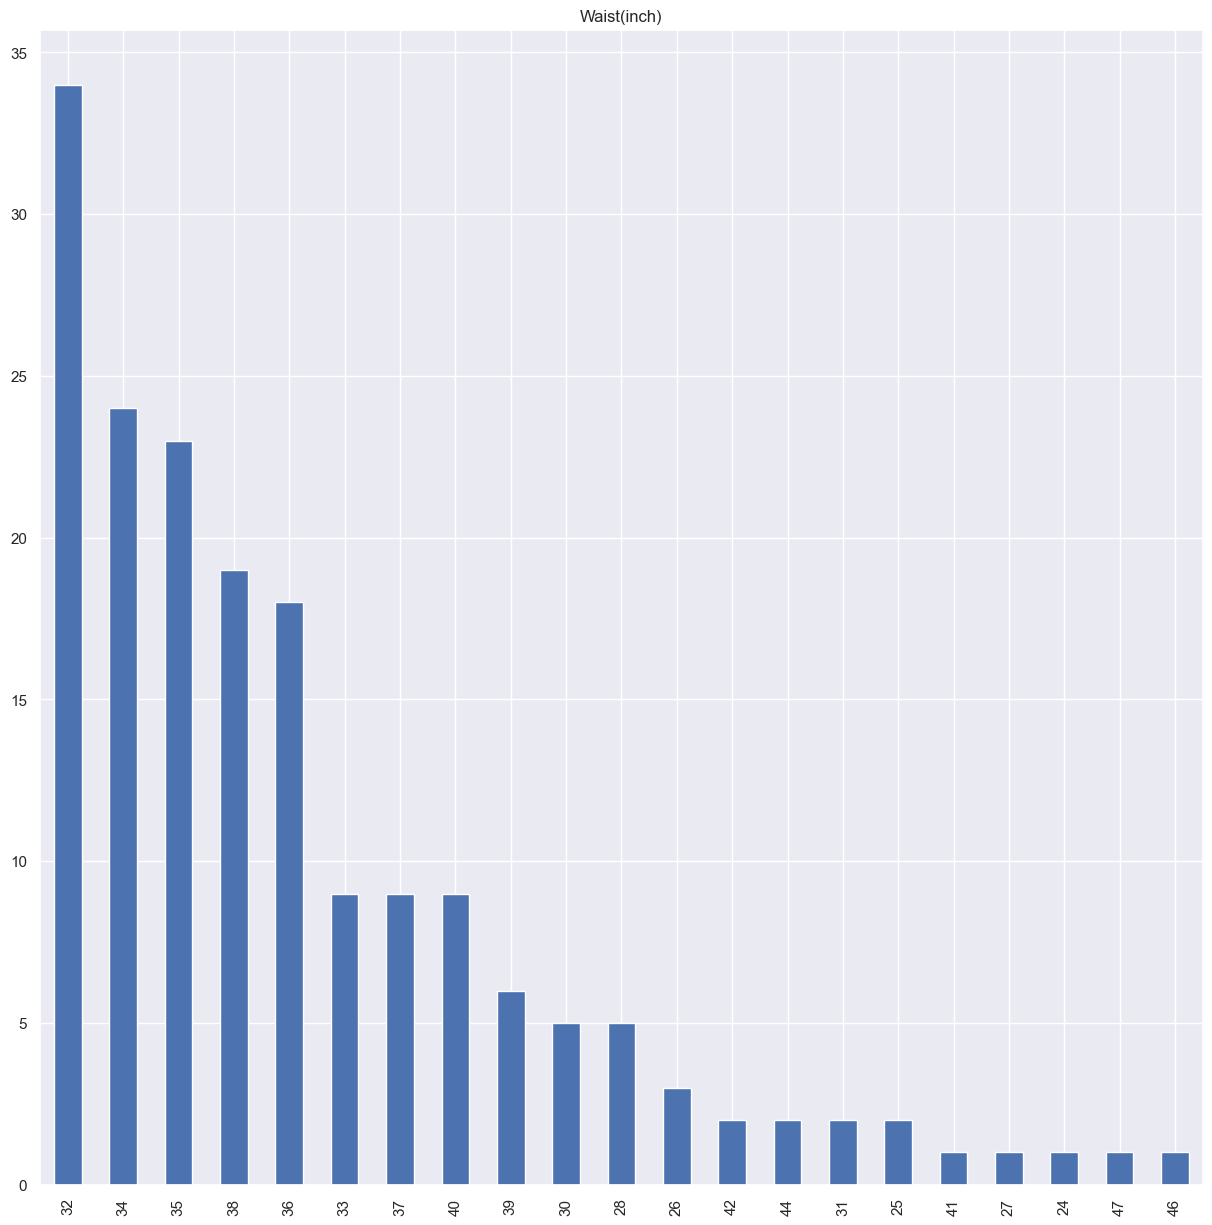

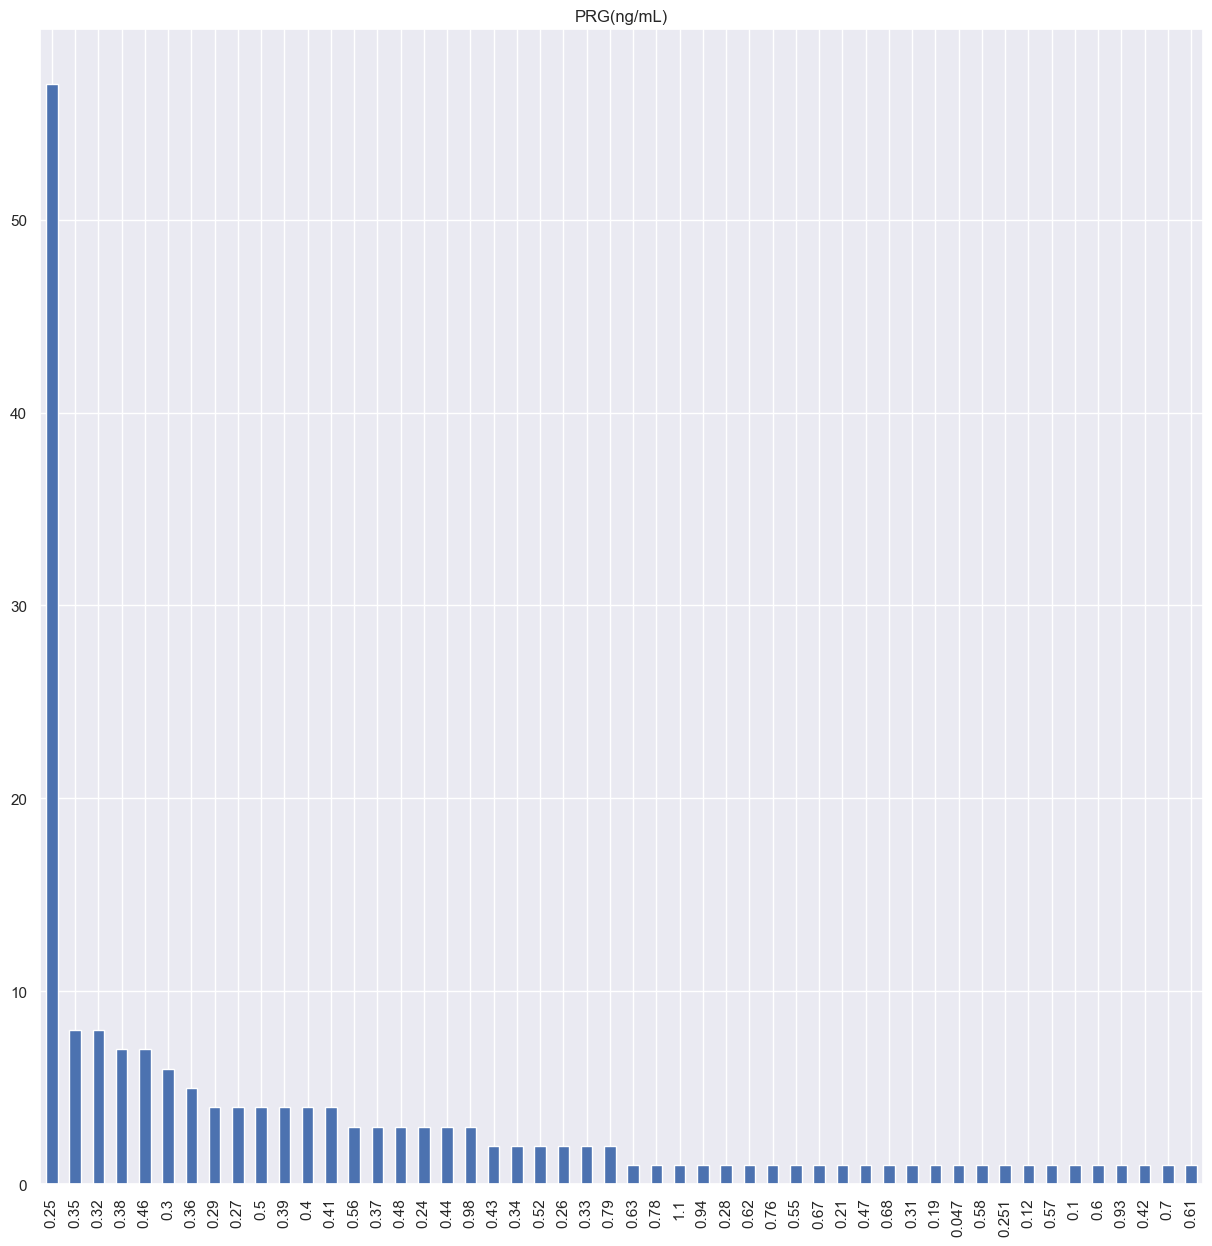

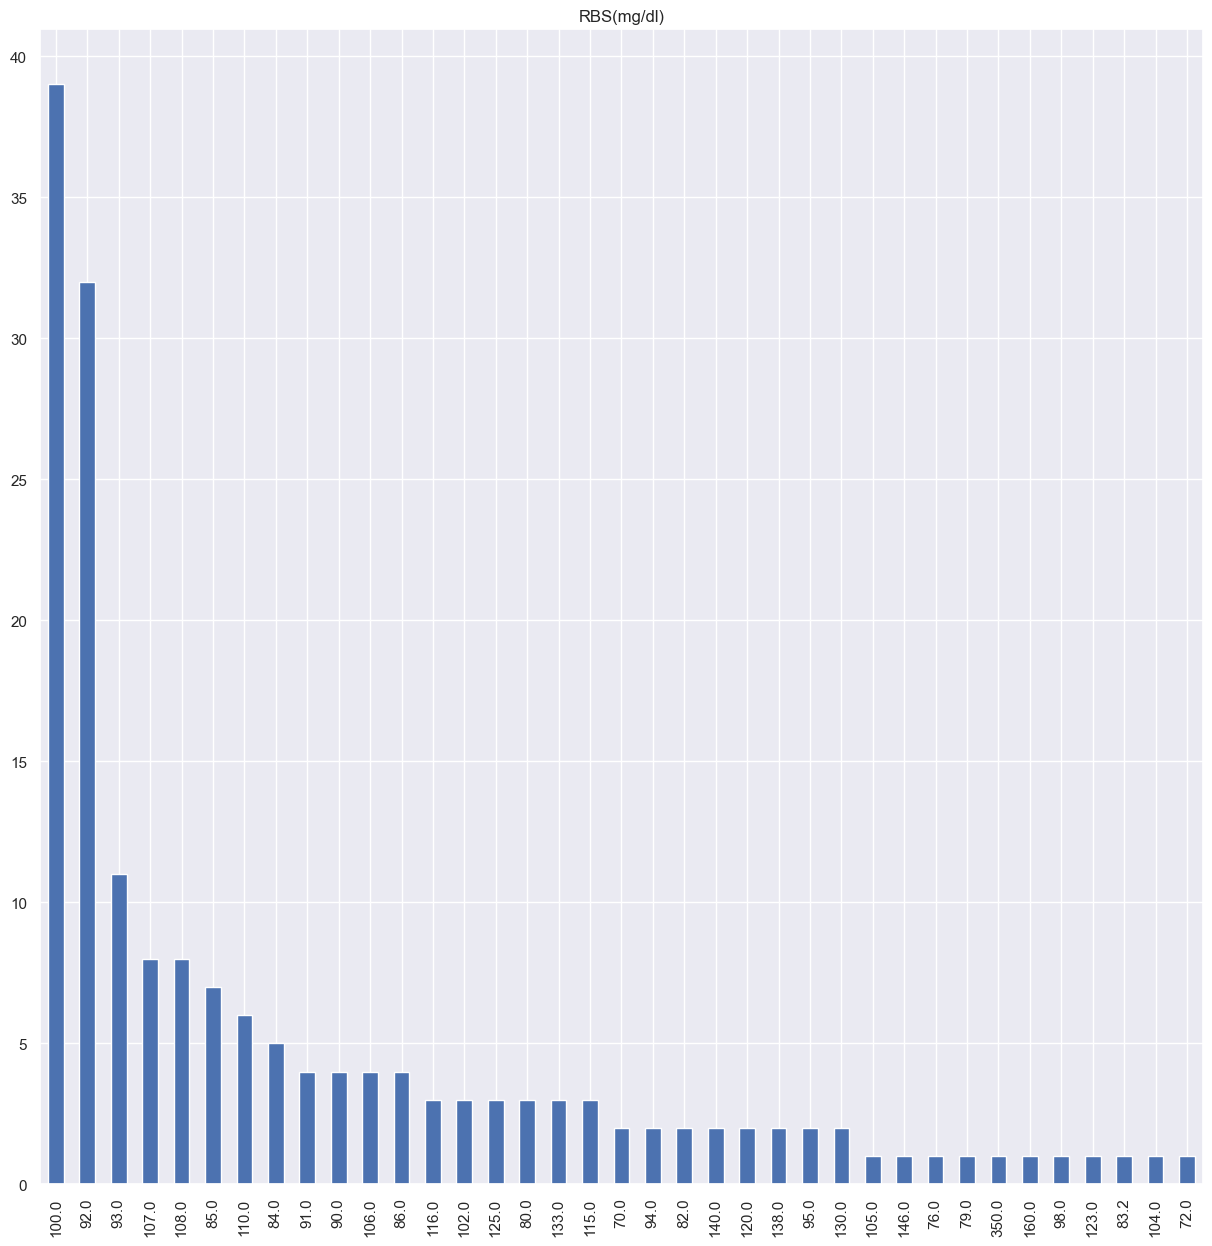

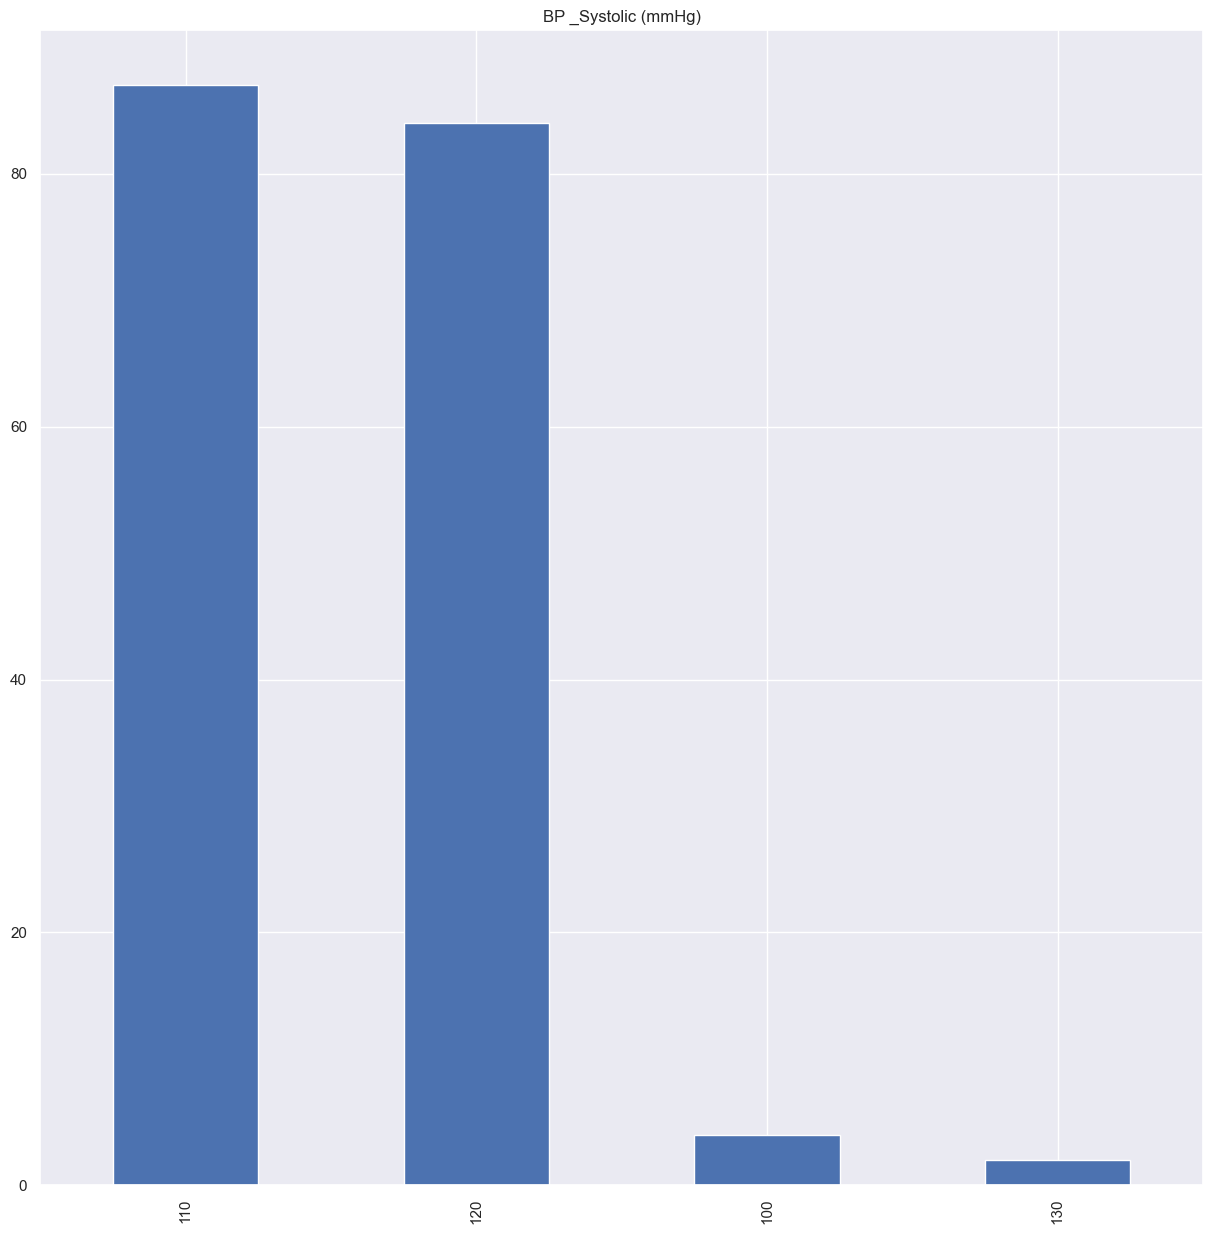

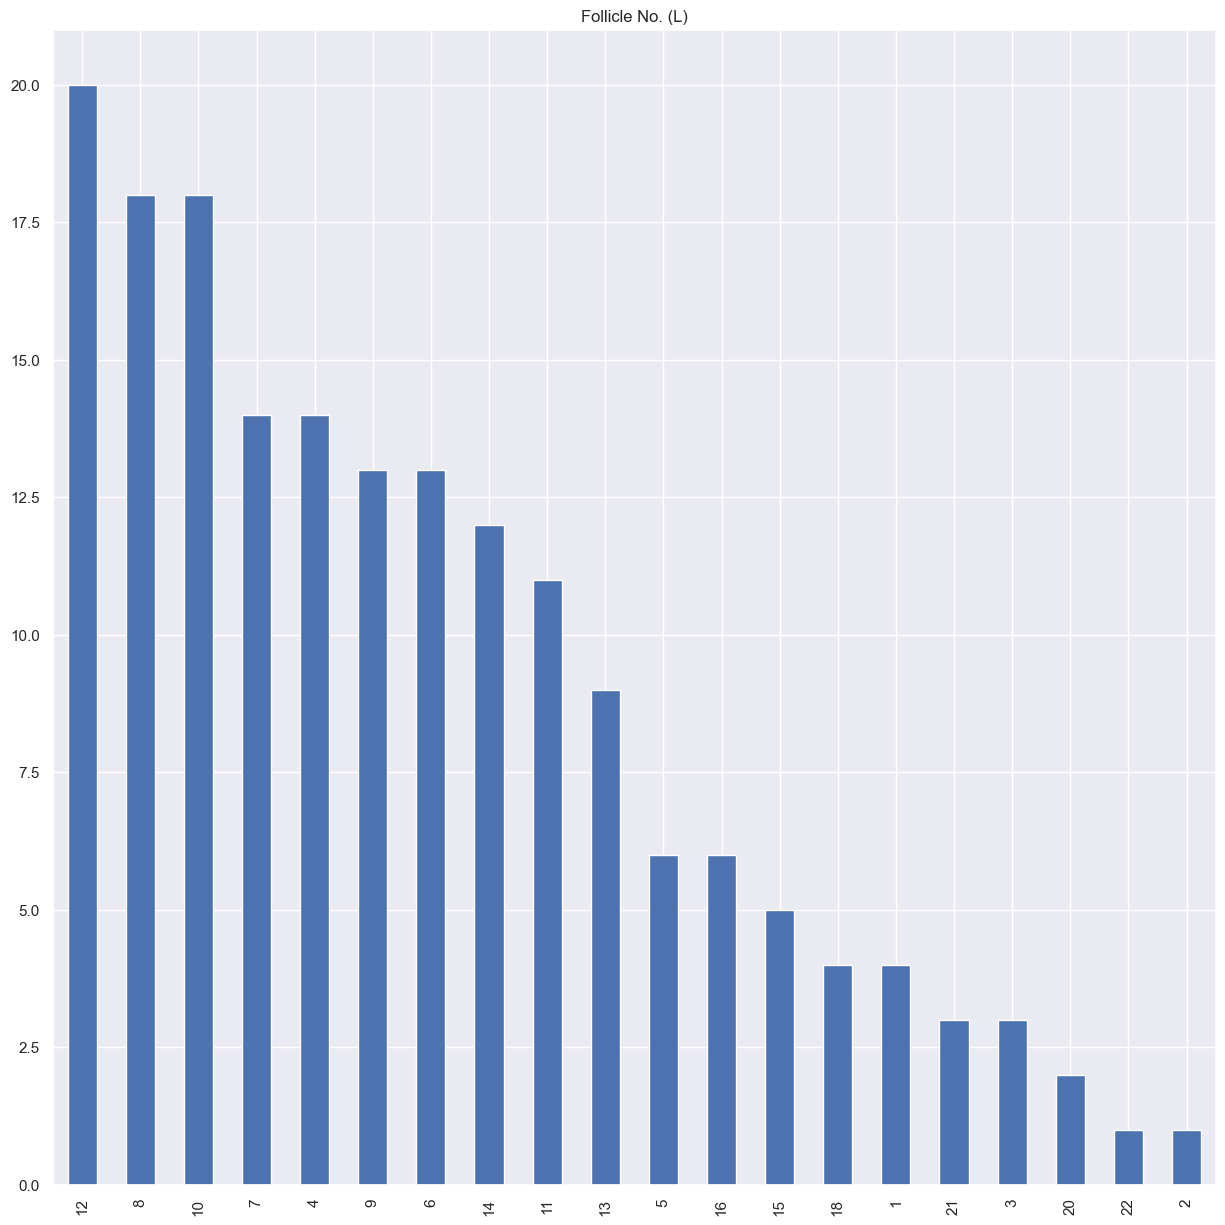

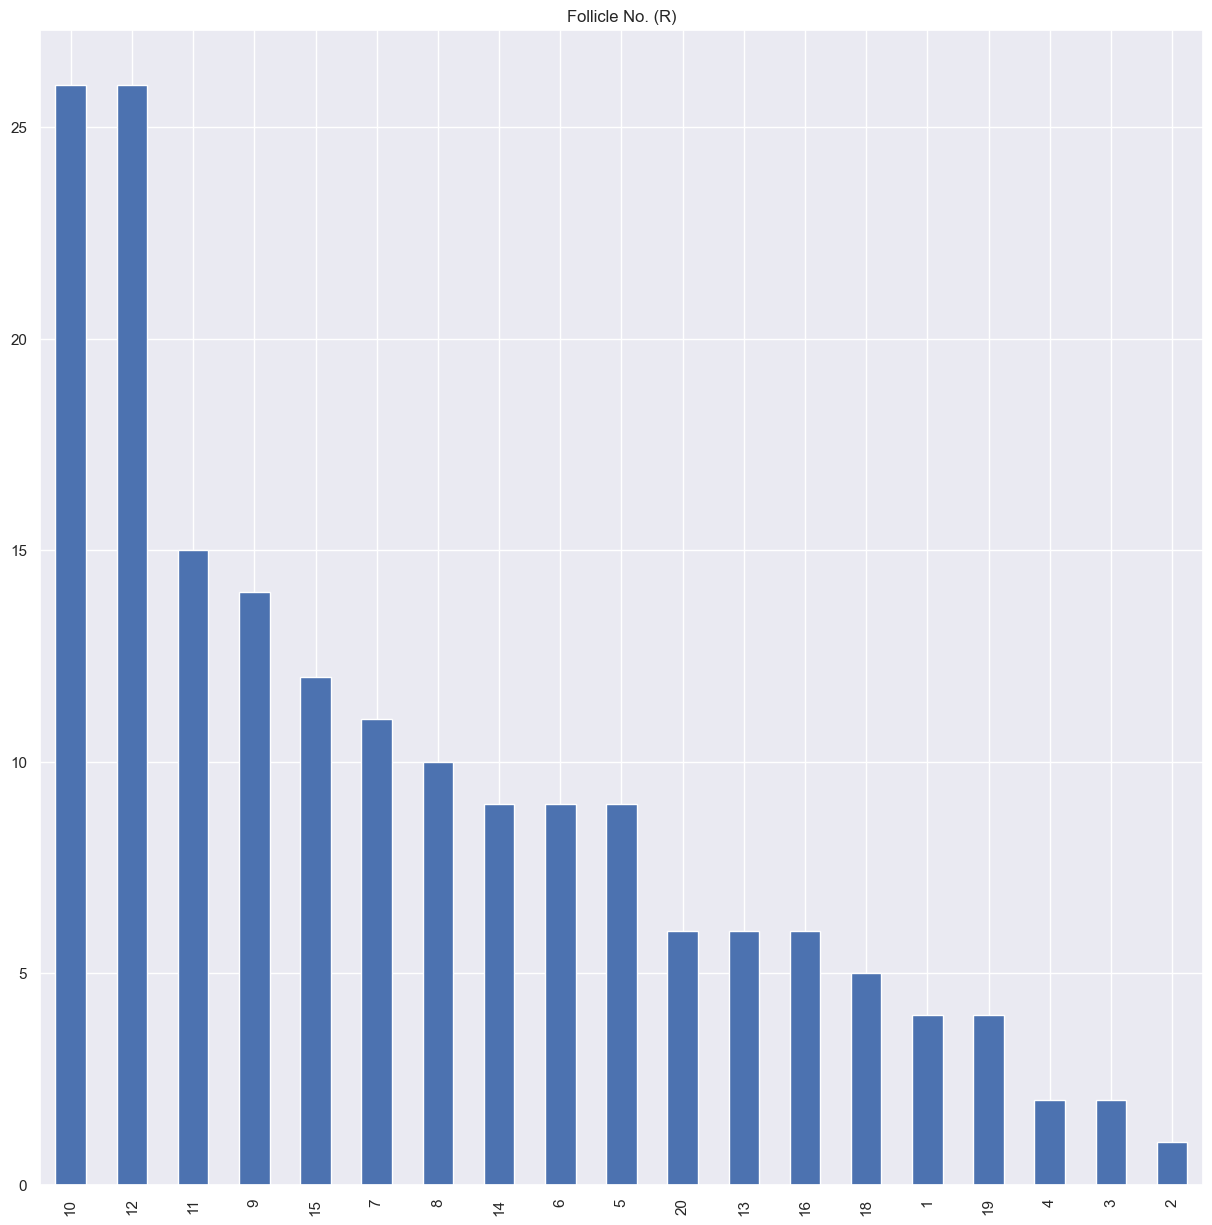

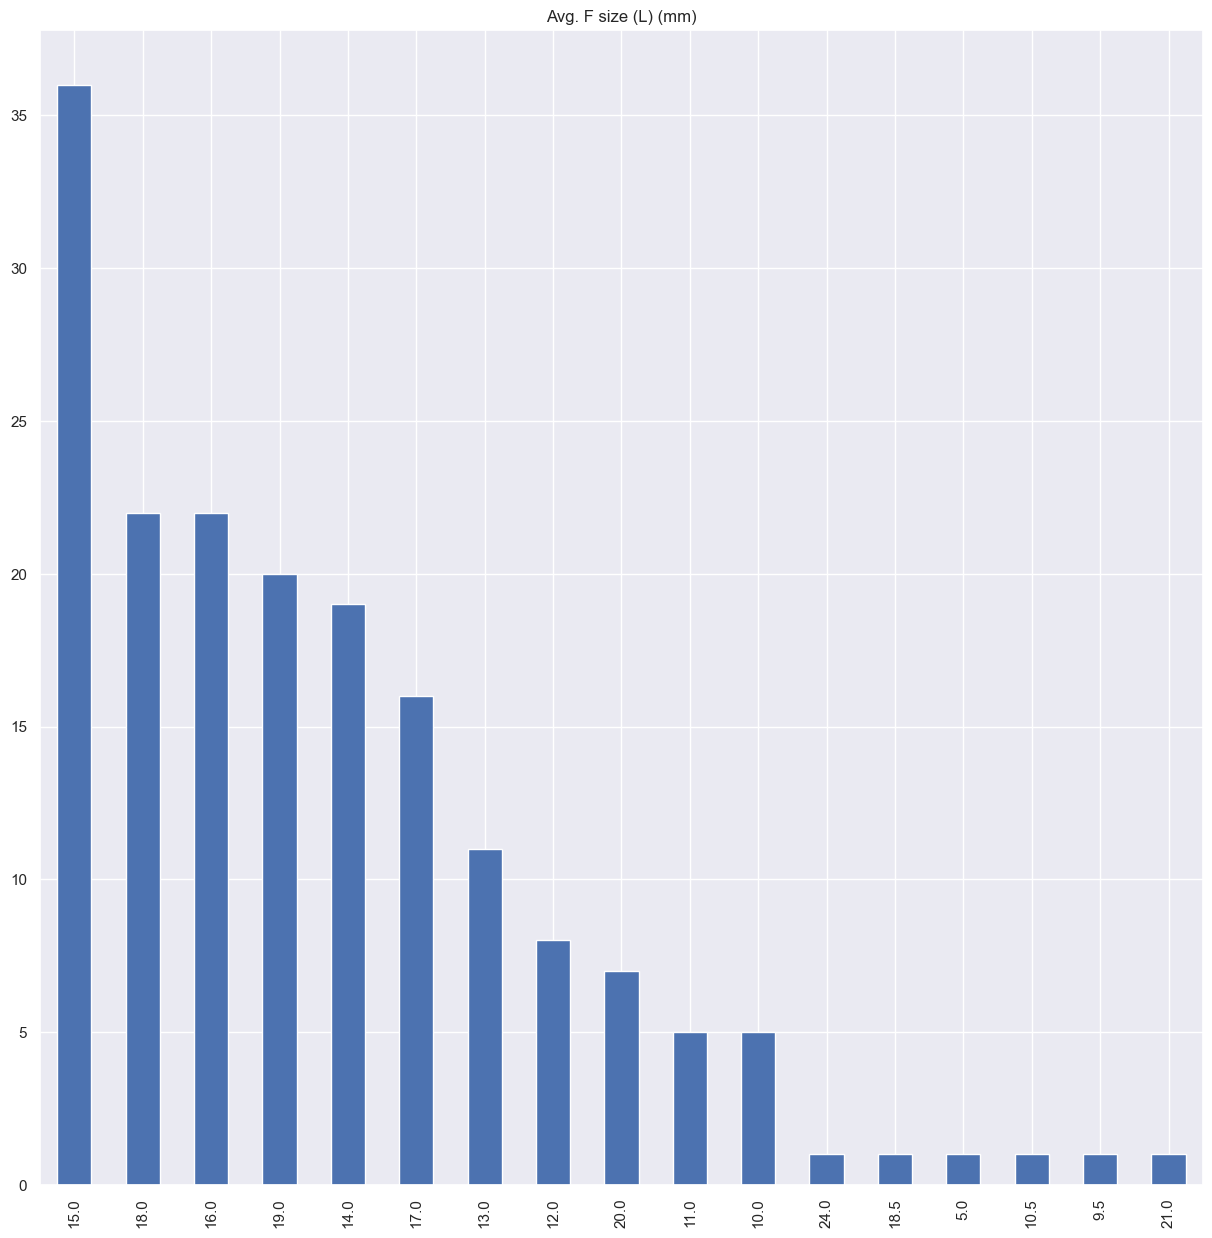

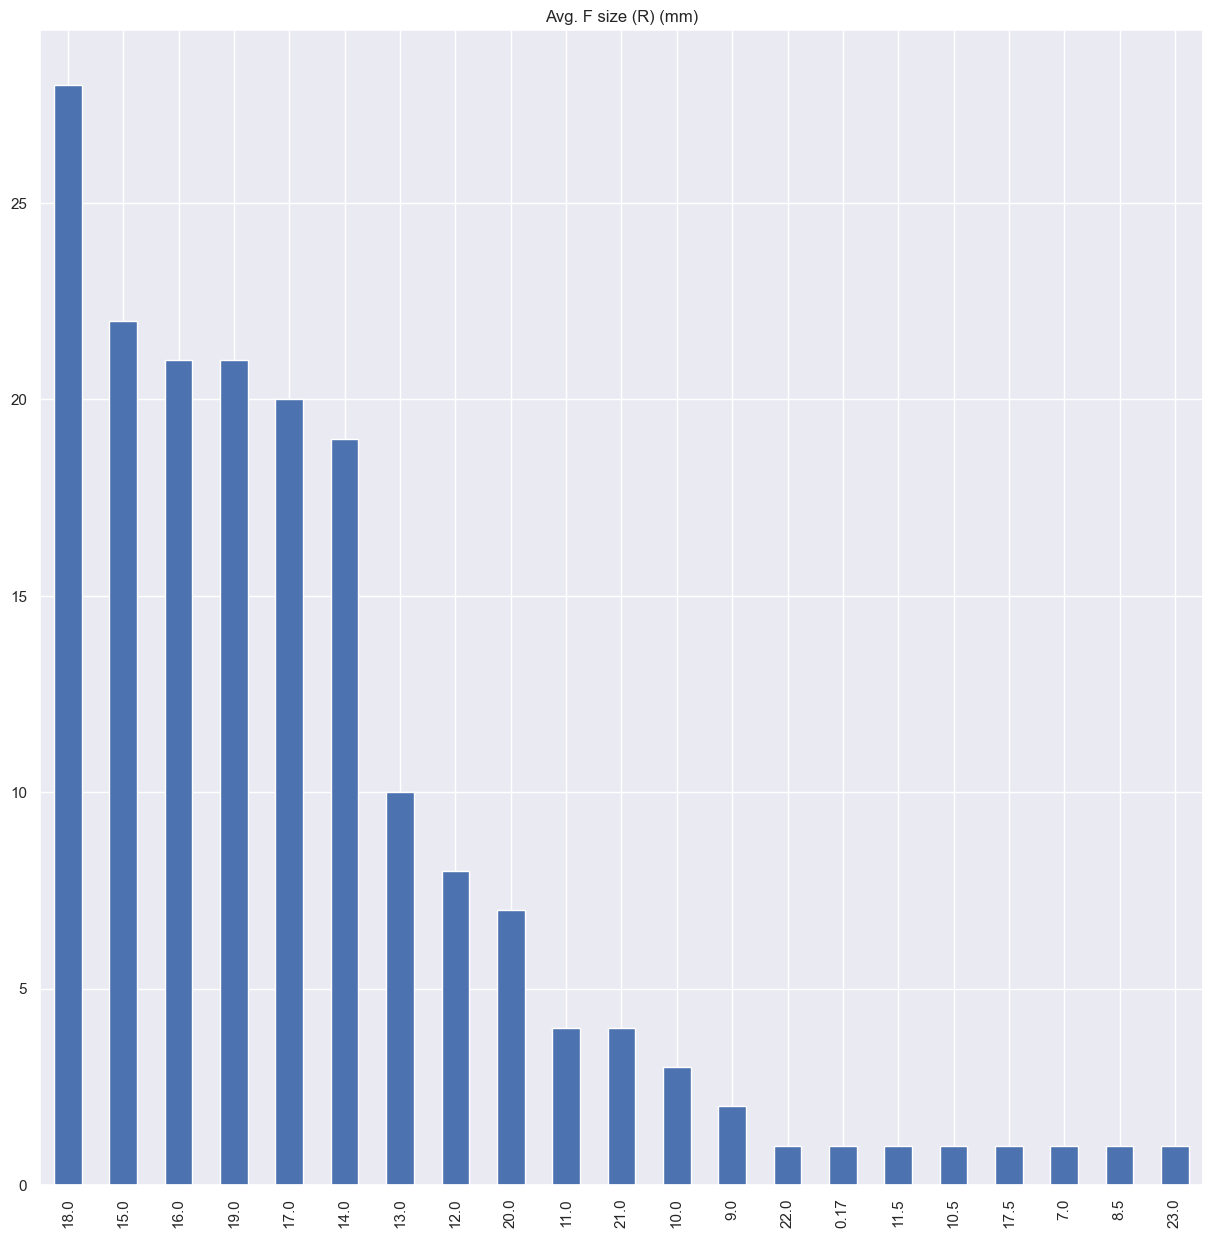

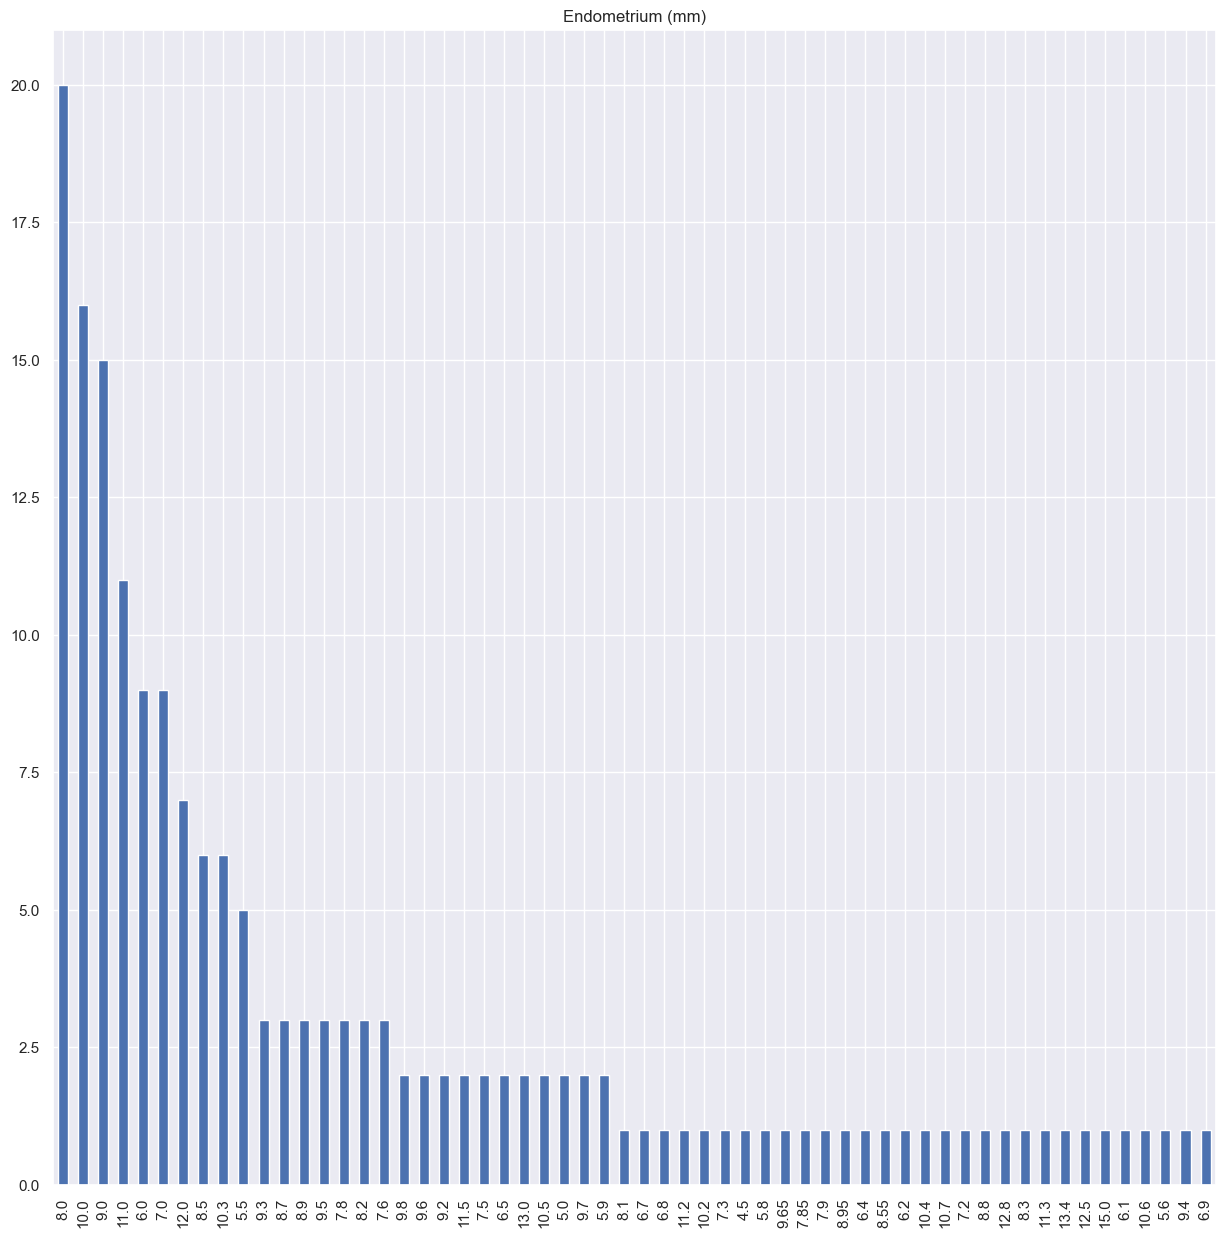

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 
for i in [' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'No. of aborptions',
        'Hip(inch)', 'Waist(inch)', 
       'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']:
  sns.set(rc = {'figure.figsize':(15,15)})
  dataset[dataset['PCOS (Y/N)'] == 1][i].value_counts().plot.bar()
  plt.title(i)
  plt.show()

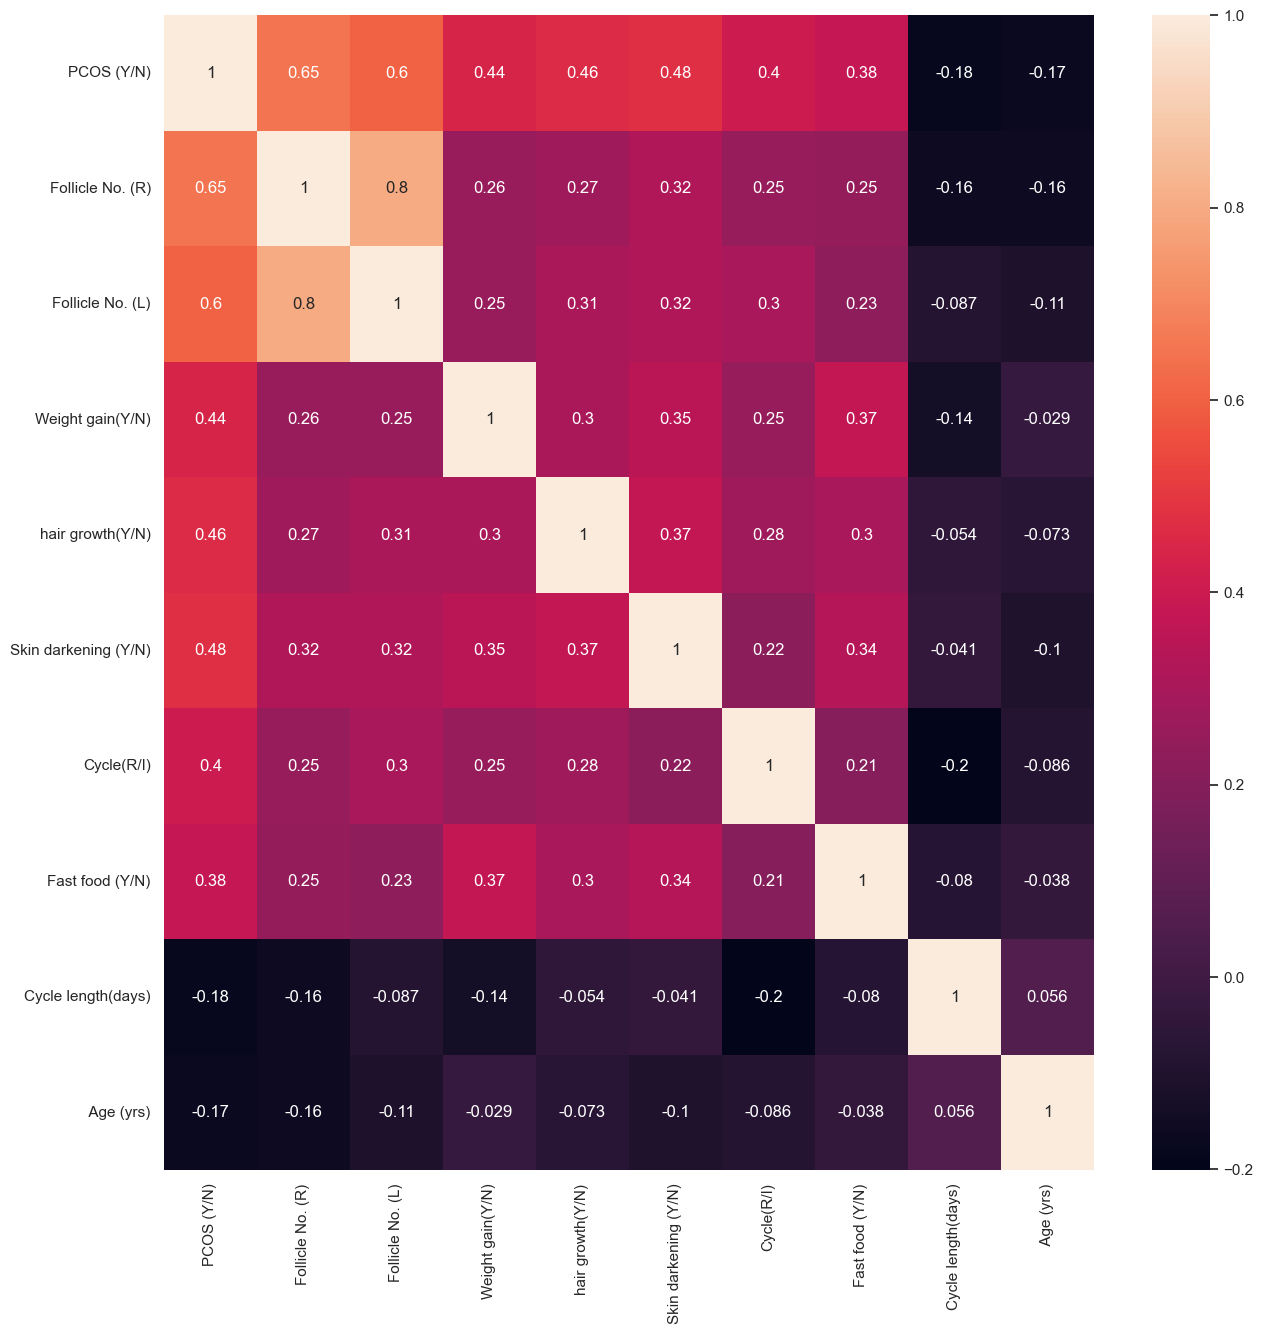

In [5]:
data = dataset[['PCOS (Y/N)','Follicle No. (R)','Follicle No. (L)','Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)','Cycle(R/I)','Fast food (Y/N)','Cycle length(days)',' Age (yrs)']]
sns.heatmap(data.corr('pearson'), annot =True )
sns.set(rc = {'figure.figsize':(60,60)})
plt.show()

In [6]:


data =dataset.drop(['Unnamed: 44'], axis=1)
data['Marraige Status (Yrs)'].fillna(0,inplace = True)
data['Fast food (Y/N)'].fillna(0,inplace = True)

print(pd.isnull(data).sum())


Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [7]:
data.info()
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [8]:
data.describe()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
count  541.000000        541.000000  541.000000  541.000000   541.000000   
mean   271.000000        271.000000    0.327172   31.430684    59.637153   
std    156.317519        156.317519    0.469615    5.411006    11.028287   
min      1.000000          1.000000    0.000000   20.000000    31.000000   
25%    136.000000        136.000000    0.000000   28.000000    52.000000   
50%    271.000000        271.000000    0.000000   31.000000    59.000000   
75%    406.000000        406.000000    1.000000   35.000000    65.000000   
max    541.000000        541.000000    1.000000   48.000000   108.000000   

       Height(Cm)          BMI  Blood Group  Pulse rate(bpm)   \
count   541.000000  541.000000   541.000000        541.000000   
mean    156.484835   24.311285    13.802218         73.247689   
std       6.033545    4.056399     1.840812          4.430285   
min     137.000000   12.417882    11.000000         13.000000   
25%     152.000000   21.641274    13.000000         72.000000   
50%     156.000000   24.238227    14.000000         72.000000   
75%     160.000000   26.634958    15.000000         74.000000   
max     180.000000   38.900000    18.000000         82.000000   

       RR (breaths/min)  ...  Pimples(Y/N)  Fast food (Y/N)  \
count        541.000000  ...    541.000000       541.000000   
mean          19.243993  ...      0.489834         0.513863   
std            1.688629  ...      0.500359         0.500270   
min           16.000000  ...      0.000000         0.000000   
25%           18.000000  ...      0.000000         0.000000   
50%           18.000000  ...      0.000000         1.000000   
75%           20.000000  ...      1.000000         1.000000   
max           28.000000  ...      1.000000         1.000000   

       Reg.Exercise(Y/N)  BP _Systolic (mmHg)  BP _Diastolic (mmHg)  \
count         541.000000           541.000000            541.000000   
mean            0.247689           114.661738             76.927911   
std             0.432070             7.384556              5.574112   
min             0.000000            12.000000              8.000000   
25%             0.000000           110.000000             70.000000   
50%             0.000000           110.000000             80.000000   
75%             0.000000           120.000000             80.000000   
max             1.000000           140.000000            100.000000   

       Follicle No. (L)  Follicle No. (R)  Avg. F size (L) (mm)  \
count        541.000000        541.000000            541.000000   
mean           6.129390          6.641405             15.018115   
std            4.229294          4.436889              3.566839   
min            0.000000          0.000000              0.000000   
25%            3.000000          3.000000             13.000000   
50%            5.000000          6.000000             15.000000   
75%            9.000000         10.000000             18.000000   
max           22.000000         20.000000             24.000000   

       Avg. F size (R) (mm)  Endometrium (mm)  
count            541.000000        541.000000  
mean              15.451701          8.475915  
std                3.318848          2.165381  
min                0.000000          0.000000  
25%               13.000000          7.000000  
50%               16.000000          8.500000  
75%               18.000000          9.800000  
max               24.000000         18.000000  

[8 rows x 44 columns]

In [9]:
# Length of menstrual phase in PCOS vs normal 
import seaborn as sns
data.columns = [col.strip() for col in data.columns]
color = ["teal", "plum"]
fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

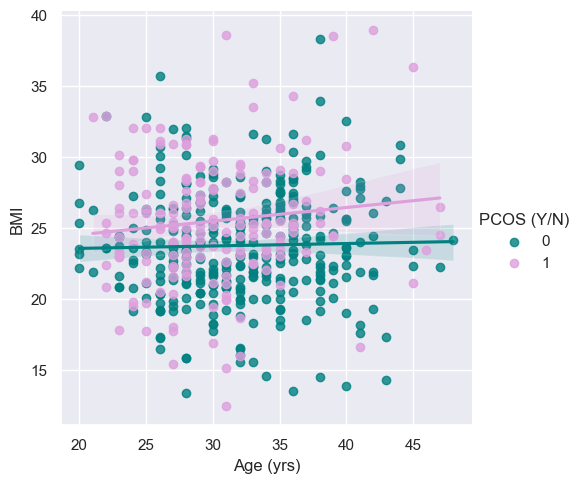

In [10]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

In [11]:
# cycle IR wrt age 
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()

In [12]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

In [13]:
#heat map
import seaborn as sns
from sklearn.model_selection import train_test_split

data['AMH(ng/mL)'].fillna(0,inplace = True)
data['II    beta-HCG(mIU/mL)'].fillna(0,inplace = True)
features=[]
pcosYN=[]
notin=["Sl. No","Patient File No."]
for i in data:
    if i not in notin:
        if i != "PCOS (Y/N)":
            features.append(i)
        else:
            pcosYN.append(i)

# var_train, var_test, res_train, res_test = train_test_split(data[features],data[pcosYN], test_size = 0.3)
var_train=data[features].iloc[:379,:]
var_test=data[features].iloc[379:,:]
res_train=data[pcosYN].iloc[:379,:]
res_test=data[pcosYN].iloc[379:,:]

core=var_train.corr()
sns.set(rc = {'figure.figsize':(60,60)})

sns.heatmap(core,annot=True)
plt.show()

In [14]:
#feature selection (pearson correlation)
atr =[]
temp_atr=[]
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]
for t in range(0,len(thresholds)):
    for i in range(len(core.columns)):
        for j in range(i):
            if abs(core.iloc[i,j])>thresholds[t]:
                col_name=core.columns[i]
                if col_name not in temp_atr:
                    temp_atr.append(col_name)

    # print("Threshold value :{}, attr :{}".format(thresholds[t],atr))
    # print(len(atr))
    atr.append(temp_atr)
    temp_atr=[]
for i in range(len(atr)):
    print("Threshold {} : {}".format(thresholds[i],atr[i]))
    print("")

Threshold 0.1 : ['Height(Cm)', 'BMI', 'Blood Group', 'RR (breaths/min)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']

Threshold 0.2 : ['Height(Cm)', 'BMI', 'RR (breaths/min)', 'Cycle(R/I)', 'Marraige Status (Yrs)', 'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'AMH(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'F

In [18]:
# #excel sheet

import openpyxl

wb = openpyxl.load_workbook("Result_sheet_pcos.xlsx")

sheet = wb.active

c1 = sheet.cell(row = 1, column = 1)
c1.value = "Threshold value"

for i in range(len(thresholds)):
    nn='A'+str(i+2)
    temp=sheet[nn]
    temp.value=thresholds[i]

c2 = sheet.cell(row= 1 , column = 2)
c2.value = "decision tree"

c3 = sheet.cell(row= 1 , column = 3)
c3.value = "adaboost"

c4 = sheet.cell(row= 1 , column = 4)
c4.value = "knn"

c5 = sheet.cell(row= 1 , column = 5)
c5.value = "random forest"

c6 = sheet.cell(row= 1 , column = 6)
c6.value = "logistic regression"

c7 = sheet.cell(row= 1 , column = 7)
c7.value = "gradient boosting"

c8 = sheet.cell(row= 1 , column = 8)
c8.value = "cat boosting"

c9 = sheet.cell(row= 1 , column = 9)
c9.value = "xg boosting"

c10 = sheet.cell(row= 1 , column = 10)
c10.value = " linear svm"

c11 = sheet.cell(row= 1 , column = 11)
c11.value = "radial svm"

c12 = sheet.cell(row= 1 , column = 12)
c12.value = "linear discriminant analysis"

c13 = sheet.cell(row= 1 , column = 13)
c13.value = " Quadratic Discriminant Analysis"

fs_no=sheet["A13"]
fs_no.value="without feature selection"


forward_selection=sheet["A15"]
forward_selection.value="forward selection"
wb.save("Result_sheet_pcos.xlsx")


In [16]:
#flag =0 means pearson correlation feature selection method
#flag =1 means wrapper forward feature selection
#flag !=0 or 1 means without feature selection



flag=1

In [17]:
#decision tree
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import math

dtree = DecisionTreeClassifier()
if flag==0:
    for i in range(len(atr)):
        atrr=atr[i]
        dtree = dtree.fit(var_train[atrr], res_train)
        score = dtree.predict(var_test[atrr])
        score=classification_report(score,res_test)
        print("Threshold {} : {}".format(thresholds[i],score))
        t="B"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=score

elif flag==1:
    ffs=SequentialFeatureSelector(dtree,k_features="best",forward=True,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    dtree.fit(var_train[features], res_train)
    score = dtree.predict(var_test[features])
    score=classification_report(score,res_test)
    fs_no=sheet["B15"]
    fs_no.value=score

else:

    dtree = dtree.fit(var_train, res_train)

    score = dtree.predict(var_test)
    score=classification_report(score,res_test)
    print("Accuracy : {}".format(score))
    fs_no=sheet["B13"]
    fs_no.value=score

wb.save("Result_sheet_pcos.xlsx")





STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

TypeError: 'NoneType' object is not iterable

In [ ]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(random_state=29)
if flag==0:
    for i in range(len(atr)):

        aa=atr[i]

        clf.fit(var_train[aa],res_train)
        train_accuracy=clf.score(var_train[aa],res_train)

        test_accuracy=clf.predict(var_test[aa])
        test_accuracy=classification_report(test_accuracy,res_test)
        # print("train accuracy : ",train_accuracy)
        print("Threshold {} : {}".format(thresholds[i],test_accuracy))
        t="C"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=test_accuracy

elif flag==1:
    ffs=SequentialFeatureSelector(clf,k_features="best",forward=True,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    clf.fit(var_train[features], res_train)
    score = clf.predict(var_test[features])
    score=classification_report(score,res_test)
    fs_no=sheet["C15"]
    fs_no.value=score
else:

    clf.fit(var_train,res_train)
    train_accuracy=clf.score(var_train,res_train)

    test_accuracy=clf.predict(var_test)
    test_accuracy=classification_report(test_accuracy,res_test)

    print("Accuracy : {}".format(test_accuracy))

    fs_no=sheet["C13"]
    fs_no.value=test_accuracy

wb.save("Result_sheet_pcos.xlsx")



In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
# datas=[]
# for i in range(0,540):
#     datas.append(data[features].iloc[i])
# x=data[features]
# y=data[pcosYN]
# predictvalue=list(data[features].iloc[540])
# print(data[pcosYN])
if flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        knn.fit(var_train[aa],res_train)

        ypred=knn.predict(var_test[aa])


        prediction = classification_report(ypred,res_test)
        print("Threshold {} : {}".format(thresholds[i],prediction))
        t="D"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=prediction

elif flag==1:
    ffs=SequentialFeatureSelector(knn,k_features="best",forward=True,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    knn.fit(var_train[features], res_train)
    score = knn.predict(var_test[features])
    score=classification_report(score,res_test)
    fs_no=sheet["D15"]
    fs_no.value=score

else:


    knn.fit(var_train,res_train)

    ypred=knn.predict(var_test)


    prediction = classification_report(ypred,res_test)
    print("Accuracy : {}".format(prediction))
    fs_no=sheet["D13"]
    fs_no.value=prediction

wb.save("Result_sheet_pcos.xlsx")

    


In [19]:
#random forest 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 70, random_state = 0)
if flag==0:

    for i in range(len(atr)):
        aa=atr[i]
    
        regressor.fit(var_train[aa],res_train)
        score=regressor.predict(var_test[aa])
        score=classification_report(score.round(),res_test)
        print("Threshold {} : {}".format(thresholds[i],score))
        t="E"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=score

elif flag==1:
    ffs=SequentialFeatureSelector(regressor,k_features="best",forward=True,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    regressor.fit(var_train[features], res_train)
    score = regressor.predict(var_test[features])
    score=classification_report(score,res_test)
    fs_no=sheet["E15"]
    fs_no.value=score

else:
    plt.subplots(figsize=(15,5))
    regressor.fit(var_train,res_train)
    score = regressor.predict(var_test)
    cf_matrix=confusion_matrix(score.round(),res_test)
    confu=sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')
    score=classification_report(score.round(),res_test)
    print("Accuracy : {}".format(score))
    fs_no=sheet["E13"]
    fs_no.value=score

wb.save("Result_sheet_pcos.xlsx")



In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
if flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        classifier.fit(var_train[aa],res_train)
        ypred=classifier.predict(var_test[aa])
        accu=classification_report(res_test,ypred)
        print("Threshold {} : {}".format(thresholds[i],accu))
        t="F"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accu

elif flag==1:
    ffs=SequentialFeatureSelector(classifier,k_features="best",forward=True,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    classifier.fit(var_train[features], res_train)
    score = classifier.predict(var_test[features])
    score=classification_report(score,res_test)
    fs_no=sheet["F15"]
    fs_no.value=score
else:


    classifier.fit(var_train,res_train)
    ypred=classifier.predict(var_test)
    accu=classification_report(res_test,ypred)
    print("Accuracy : {}".format(accu))
    fs_no=sheet["F13"]
    fs_no.value=accu

wb.save("Result_sheet_pcos.xlsx")


In [ ]:
#gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
if flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        gb_clf.fit(var_train[aa],res_train)
        accu=gb_clf.predict(var_test[aa],)
        accu=classification_report(accu,res_test)
        print("Threshold {} : {}".format(thresholds[i],accu))
        t="G"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accu

elif flag==1:
    ffs=SequentialFeatureSelector(gb_clf,k_features="best",forward=True,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    gb_clf.fit(var_train[features], res_train)
    score = gb_clf.predict(var_test[features])
    score=classification_report(score,res_test)
    fs_no=sheet["G15"]
    fs_no.value=score

else:


    gb_clf.fit(var_train,res_train)
    accu=gb_clf.predict(var_test)
    accu=classification_report(accu,res_test)
    print("Accuracy: {}".format(accu))
    fs_no=sheet["G13"]
    fs_no.value=accu

wb.save("Result_sheet_pcos.xlsx")

    

In [ ]:
#cat boosting
from catboost import CatBoostClassifier
cat_features=[0,1,2,3,4,5,6,7,8]
clf = CatBoostClassifier(iterations=4,learning_rate=0.1)
if  flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        clf.fit(var_train[aa], res_train)
        pred = clf.predict(var_test[aa])
        accu=classification_report(pred,res_test)
        print("Threshold {} : {}".format(thresholds[i],accu))
        t="H"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accu

elif flag==1:
    ffs=SequentialFeatureSelector(clf,k_features="best",forward=True,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    clf.fit(var_train[features], res_train)
    score = clf.predict(var_test[features])
    score=classification_report(score,res_test)
    fs_no=sheet["H15"]
    fs_no.value=score


else:
    clf.fit(var_train, res_train)
    pred = clf.predict(var_test)
    accu=classification_report(pred,res_test)
    print("Accuracy : {}".format(accu))
    fs_no=sheet["H13"]
    fs_no.value=accu

wb.save("Result_sheet_pcos.xlsx")




0:	learn: 0.6475557	total: 65.9ms	remaining: 198ms
1:	learn: 0.6079546	total: 67.9ms	remaining: 67.9ms
2:	learn: 0.5761333	total: 69.4ms	remaining: 23.1ms
3:	learn: 0.5404499	total: 72.8ms	remaining: 0us


In [ ]:
#xg boosting
from xgboost import XGBClassifier



model = XGBClassifier()
if flag==0:
    for i in range(len(atr)):
        aa=atr[i]

        model.fit(var_train[aa], res_train)

        y_pred = model.predict(var_test[aa])
        predictions = [round(value) for value in y_pred]


        accuracy = classification_report(res_test, predictions)
        print("Threshold {} : {}".format(thresholds[i],accuracy))
        t="I"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accuracy

elif flag==1:
    ffs=SequentialFeatureSelector(model,k_features="best",forward=True,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    model.fit(var_train[features], res_train)
    score = model.predict(var_test[features])
    score=classification_report(score,res_test)
    fs_no=sheet["I15"]
    fs_no.value=score

else:


    model.fit(var_train, res_train)

    y_pred = model.predict(var_test)
    predictions = [round(value) for value in y_pred]


    accuracy = classification_report(res_test, predictions)
    print("Accuracy: {}".format(accuracy))
    fs_no=sheet["I13"]
    fs_no.value=accuracy

wb.save("Result_sheet_pcos.xlsx")



In [ ]:
# linear svm
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
if flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        svclassifier.fit(var_train[aa],res_train)

        y_pred = svclassifier.predict(var_test[aa])
        accu=classification_report(res_test,y_pred)
        print("Threshold {} : {}".format(thresholds[i],accu))
        t="J"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accu

elif flag==1:
    ffs=SequentialFeatureSelector(svclassifier,k_features="best",forward=True,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    svclassifier.fit(var_train[features], res_train)
    score = svclassifier.predict(var_test[features])
    score=classification_report(score,res_test)
    fs_no=sheet["J15"]
    fs_no.value=score
else:


    svclassifier.fit(var_train,res_train)

    y_pred = svclassifier.predict(var_test)
    accu=classification_report(res_test,y_pred)
    print("Accuracy : {}".format(accu))
    fs_no=sheet["J13"]
    fs_no.value=accu

wb.save("Result_sheet_pcos.xlsx")



In [ ]:
#radial svm 

from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
if flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        svclassifier.fit(var_train[aa],res_train)

        y_pred = svclassifier.predict(var_test[aa])
        accu=classification_report(res_test,y_pred)
        print("Threshold {} : {}".format(thresholds[i],accu))
        t="K"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accu


elif flag==1:
    ffs=SequentialFeatureSelector(svclassifier,k_features="best",forward=True,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    svclassifier.fit(var_train[features], res_train)
    score = svclassifier.predict(var_test[features])
    score=classification_report(score,res_test)
    fs_no=sheet["K15"]
    fs_no.value=score

else:

    svclassifier.fit(var_train,res_train)

    y_pred = svclassifier.predict(var_test)
    accu=classification_report(res_test,y_pred)
    print("Accuracy : {}".format(accu))
    fs_no=sheet["K13"]
    fs_no.value=accu

wb.save("Result_sheet_pcos.xlsx")



In [ ]:
#linear discriminant analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
if flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        lda.fit_transform(var_train[aa], res_train)
        y_pred = lda.predict(var_test[aa])
        accu=classification_report(res_test,y_pred)
        print("Threshold {} : {}".format(thresholds[i],accu))
        t="L"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accu

elif flag==1:
    ffs=SequentialFeatureSelector(lda,k_features="best",forward=True,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    lda.fit(var_train[features], res_train)
    score = lda.predict(var_test[features])
    score=classification_report(score,res_test)
    fs_no=sheet["L15"]
    fs_no.value=score

else:

    lda.fit_transform(var_train, res_train)
    y_pred = lda.predict(var_test)
    accu=classification_report(res_test,y_pred)
    print("Accuracy: {}".format(accu))
    fs_no=sheet["L13"]
    fs_no.value=accu

wb.save("Result_sheet_pcos.xlsx")






In [ ]:
# Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA_model_default = QuadraticDiscriminantAnalysis()
if flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        QDA_model_default.fit(var_train[aa], res_train)
        y_pred_QDA_default =QDA_model_default.predict(var_test[aa])
        accu=classification_report(y_pred_QDA_default,res_test)
        print("Threshold {} : {}".format(thresholds[i],accu))
        t="M"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accu

elif flag==1:
    ffs=SequentialFeatureSelector(QDA_model_default,k_features="best",forward=True,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    QDA_model_default.fit(var_train[features], res_train)
    score = QDA_model_default.predict(var_test[features])
    score=classification_report(score,res_test)
    fs_no=sheet["M15"]
    fs_no.value=score

else:

    QDA_model_default.fit(var_train, res_train)
    y_pred_QDA_default =QDA_model_default.predict(var_test)
    accu=classification_report(y_pred_QDA_default,res_test)
    print("Accuracy : {}".format(accu))
    fs_no=sheet["M13"]
    fs_no.value=accu

wb.save("Result_sheet_pcos.xlsx")


In [ ]:
print("testing")

testing


FORWARD FEATURE SELECTION METHOD


In [ ]:
#decision tree
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
ffs=SequentialFeatureSelector(lr,k_features='best',forward=True,n_jobs=-1,)
# ffs=SequentialFeatureSelector()


ffs.fit(var_train,res_train)
features=list(ffs.k_feature_names_)


dtree = dtree.fit(var_train[features], res_train)

score = dtree.score(var_test[features], res_test)
print("Accuracy : {}".format(score))




STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

TypeError: 'NoneType' object is not iterable

In [ ]:
#adaboost

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
ffs=SequentialFeatureSelector(clf,k_features='best',forward=True,n_jobs=-1)
ffs.fit(var_train,res_train)
features=list(ffs.k_feature_names_)
print(features)



clf.fit(var_train[features],res_train)
train_accuracy=clf.score(var_train[features],res_train)
test_accuracy=clf.score(var_test[features],res_test)
print("Accuracy : {}".format(test_accuracy))

In [ ]:
#knn

knn.fit(var_train[features],res_train)
ypred=knn.predict(var_test[features])
prediction = accuracy_score(ypred,res_test)
print("Accuracy : {}".format(prediction))

In [ ]:
#random forest 

regressor.fit(var_train[features],res_train)
score = regressor.score(var_test[features],res_test)    
print("Accuracy : {}".format(regressor.score(var_test[features],res_test)))

In [ ]:
#logistic regresssion

classifier.fit(var_train[features],res_train)
ypred=classifier.predict(var_test[features])
accu=accuracy_score(res_test,ypred)
print("Accuracy : {}".format(accu))


In [ ]:
#gradient boosting

gb_clf.fit(var_train[features],res_train)
accu=gb_clf.score(var_test[features],res_test)
print("Accuracy: {}".format(accu))

In [ ]:
#catboost

clf.fit(var_train[features], res_train)
pred = clf.predict(var_test[features])
accu=accuracy_score(pred,res_test)
print("Accuracy: {}".format(accu))


In [ ]:
#xgboost

model.fit(var_train[features], res_train)
y_pred = model.predict(var_test[features])
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(res_test, predictions)
print("Accuracy : {}".format(accuracy))


In [ ]:
svclassifier.fit(var_train[features],res_train)
y_pred = svclassifier.predict(var_test[features])
accu=accuracy_score(res_test,y_pred)
print("Accuracy : {}".format(accu))

In [ ]:
#radial svm

svclassifier.fit(var_train[features],res_train)
y_pred = svclassifier.predict(var_test[features])
accu=accuracy_score(res_test,y_pred)
print("Accuracy : {}".format(accu))


In [ ]:
#lda

lda.fit_transform(var_train[features], res_train)
y_pred = lda.predict(var_test[features])
accu=accuracy_score(res_test,y_pred)
print("Accuracy: {}".format(accu))

In [ ]:
#QDA


from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
ffs=SequentialFeatureSelector(lr,k_features='best',forward=True,n_jobs=-1)
ffs.fit(var_train,res_train)
features=list(ffs.k_feature_names_)
print(features)

QDA_model_default.fit(var_train[features], res_train)
y_pred_QDA_default =QDA_model_default.predict(var_test[features])
accu=accuracy_score(y_pred_QDA_default,res_test)
print("Accuracy : {}".format(accu))